In [115]:
import numpy as np
import pandas as pd
import scipy.io.arff as arff
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as iter

In [116]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

In [117]:
data = arff.loadarff(r'..\01. UCI\glass.arff')

In [118]:
df = pd.DataFrame(data[0])
df.head()

df_no_label = df.copy()
df_no_label.drop(columns=['Class'], inplace=True)

<Axes: title={'center': 'Correlation Matrix of Glass Dataset Features'}>

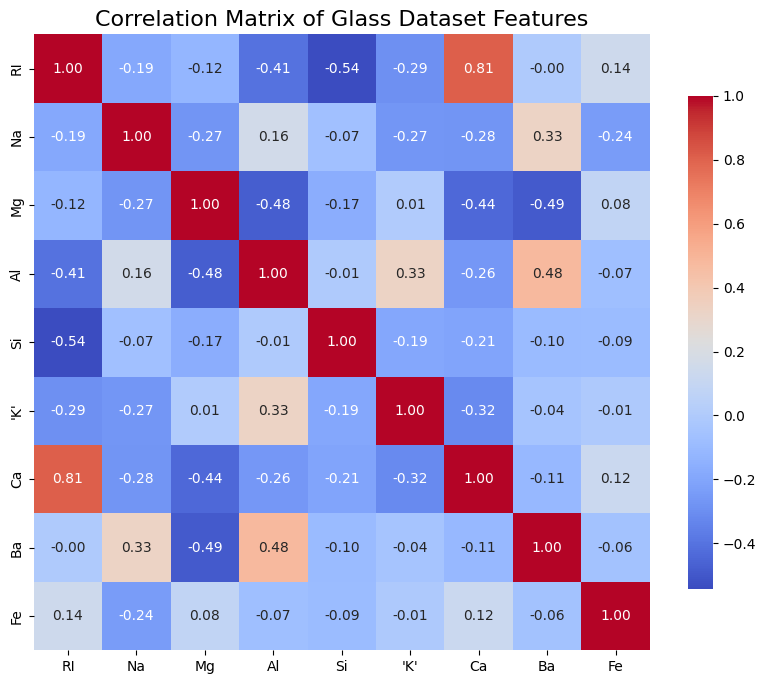

In [119]:
corr_matrix = df_no_label.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix of Glass Dataset Features', fontsize=16)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

<Axes: xlabel='Ca', ylabel='RI'>

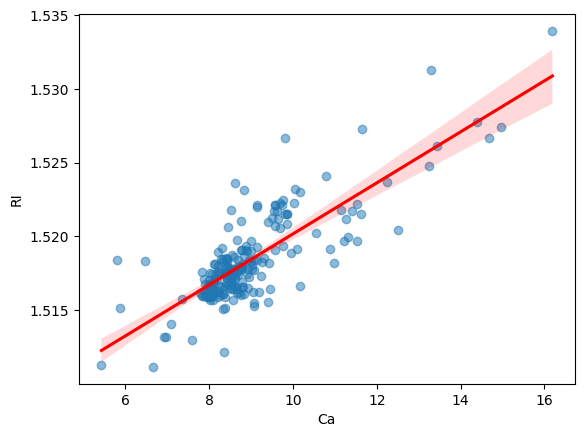

In [120]:
sns.regplot(x="Ca", y="RI", data=df_no_label, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})

In [121]:
feature_array = df_no_label.columns
print(len(feature_array))

9


In [122]:
df["ClassCode"] = pd.Categorical(df["Class"]).codes
df.head()

RI     Na    Mg    Al     Si   'K'    Ca    Ba    Fe                    Class  ClassCode
0  1.51567  13.29  3.45  1.21  72.74  0.56  8.57  0.00  0.00      b'build_wind_float'          0
1  1.52667  13.99  3.70  0.71  71.57  0.02  9.82  0.00  0.10      b'build_wind_float'          0
2  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.00            b'containers'          2
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00      b'build_wind_float'          0
4  1.52068  13.55  2.09  1.67  72.18  0.53  9.57  0.27  0.17  b'build_wind_non-float'          1

<Axes: title={'center': 'Correlation Matrix of Glass Dataset Features'}>

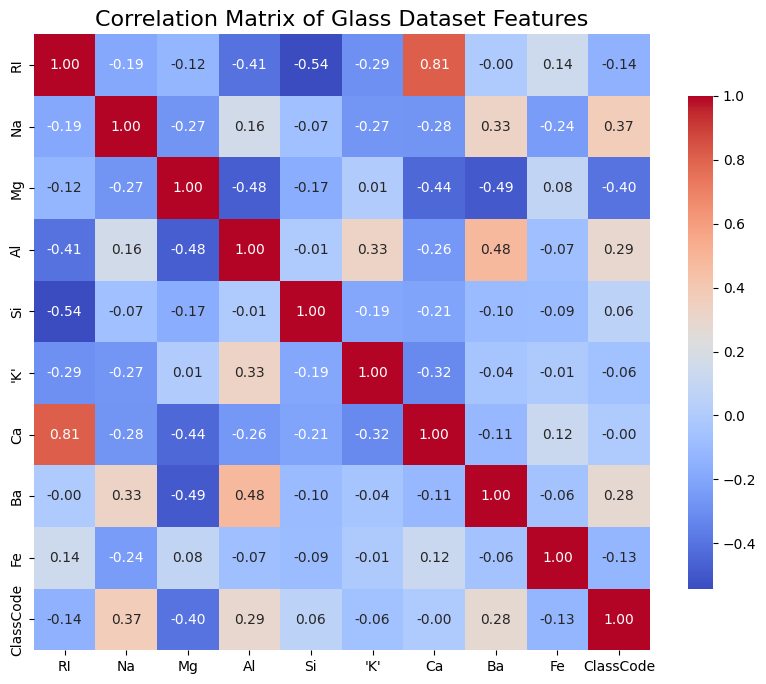

In [123]:
corr_matrix = df.drop("Class", axis=1).corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix of Glass Dataset Features', fontsize=16)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [124]:
X = df[feature_array]
y = df["ClassCode"]

comparison = pd.DataFrame(df["Class"], df["ClassCode"])

Text(0.5, 1.0, 'Violin Plot of Ca VS ClassCode')

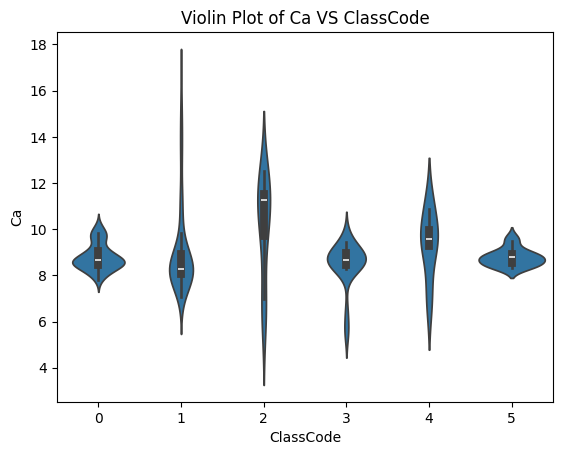

In [125]:
sns.violinplot(y=df["Ca"], x=df["ClassCode"])
plt.title("Violin Plot of Ca VS ClassCode")

In [126]:
X_real = X.values
n_samples, n_features = X.shape

In [127]:
X_fake = np.random.uniform(X_real.min(axis=0), X_real.max(axis=0), size=(n_samples, n_features))

X_combined = np.vstack([X_real, X_fake])
y_combined = np.array([1]*n_samples + [0]*n_samples)


In [128]:
rf = skl.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_combined, y_combined)

# Get feature importances
importances = rf.feature_importances_
print(importances)
feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Select top features
top_features = feature_ranks.head(5).index.tolist()

[0.03645569 0.01804736 0.05253877 0.0240972  0.00909514 0.249828
 0.06169941 0.36228807 0.18595036]


In [129]:
print(top_features)

['Ba', "'K'", 'Fe', 'Ca', 'Mg']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4140\1677240212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df[feature], x=df["ClassCode"], ax=axes[idx], palette="coolwarm")
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.4% of the points cannot be placed; yo

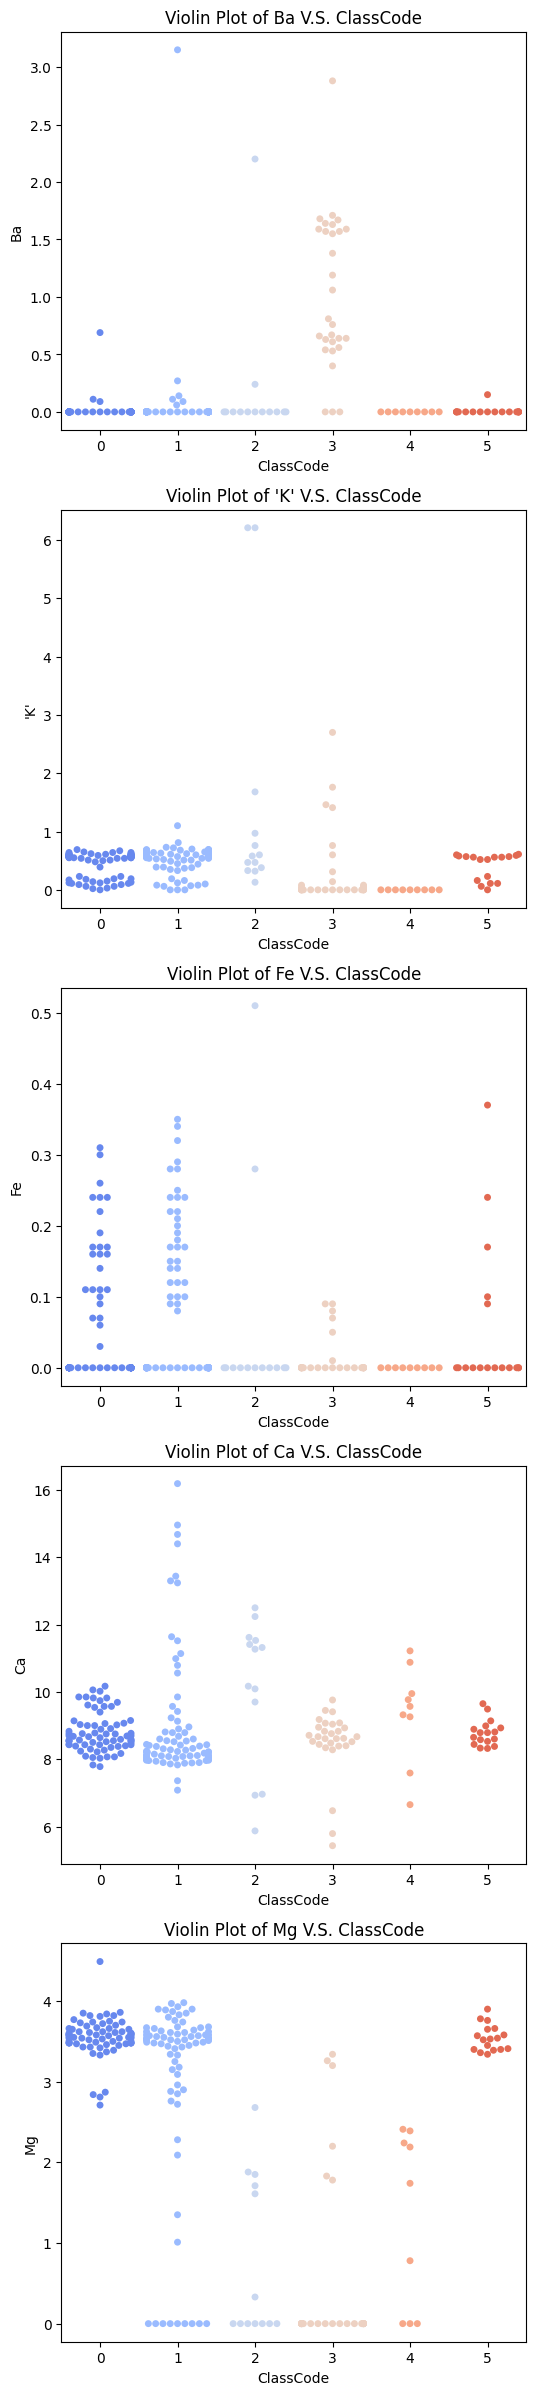

In [130]:
fig, axes = plt.subplots(5, 1, figsize=(6, 30))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    sns.swarmplot(y=df[feature], x=df["ClassCode"], ax=axes[idx], palette="coolwarm")
    axes[idx].set_title(f"Violin Plot of {feature} V.S. ClassCode")

In [131]:
df.groupby("ClassCode")["Class"].unique()

ClassCode
0        [b'build_wind_float']
1    [b'build_wind_non-float']
2              [b'containers']
3               [b'headlamps']
4               [b'tableware']
5        [b'vehic_wind_float']
Name: Class, dtype: object

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4140\3692707932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y=df[feature], x=df["ClassMerged"], ax=axes[idx], palette="coolwarm")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4140\3692707932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y=df[feature], x=df["ClassMerged"], ax=axes[idx], palette="coolwarm")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4140\3692707932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y=df[feature], x=df["ClassMerged"], ax=axes[idx], palette="coo

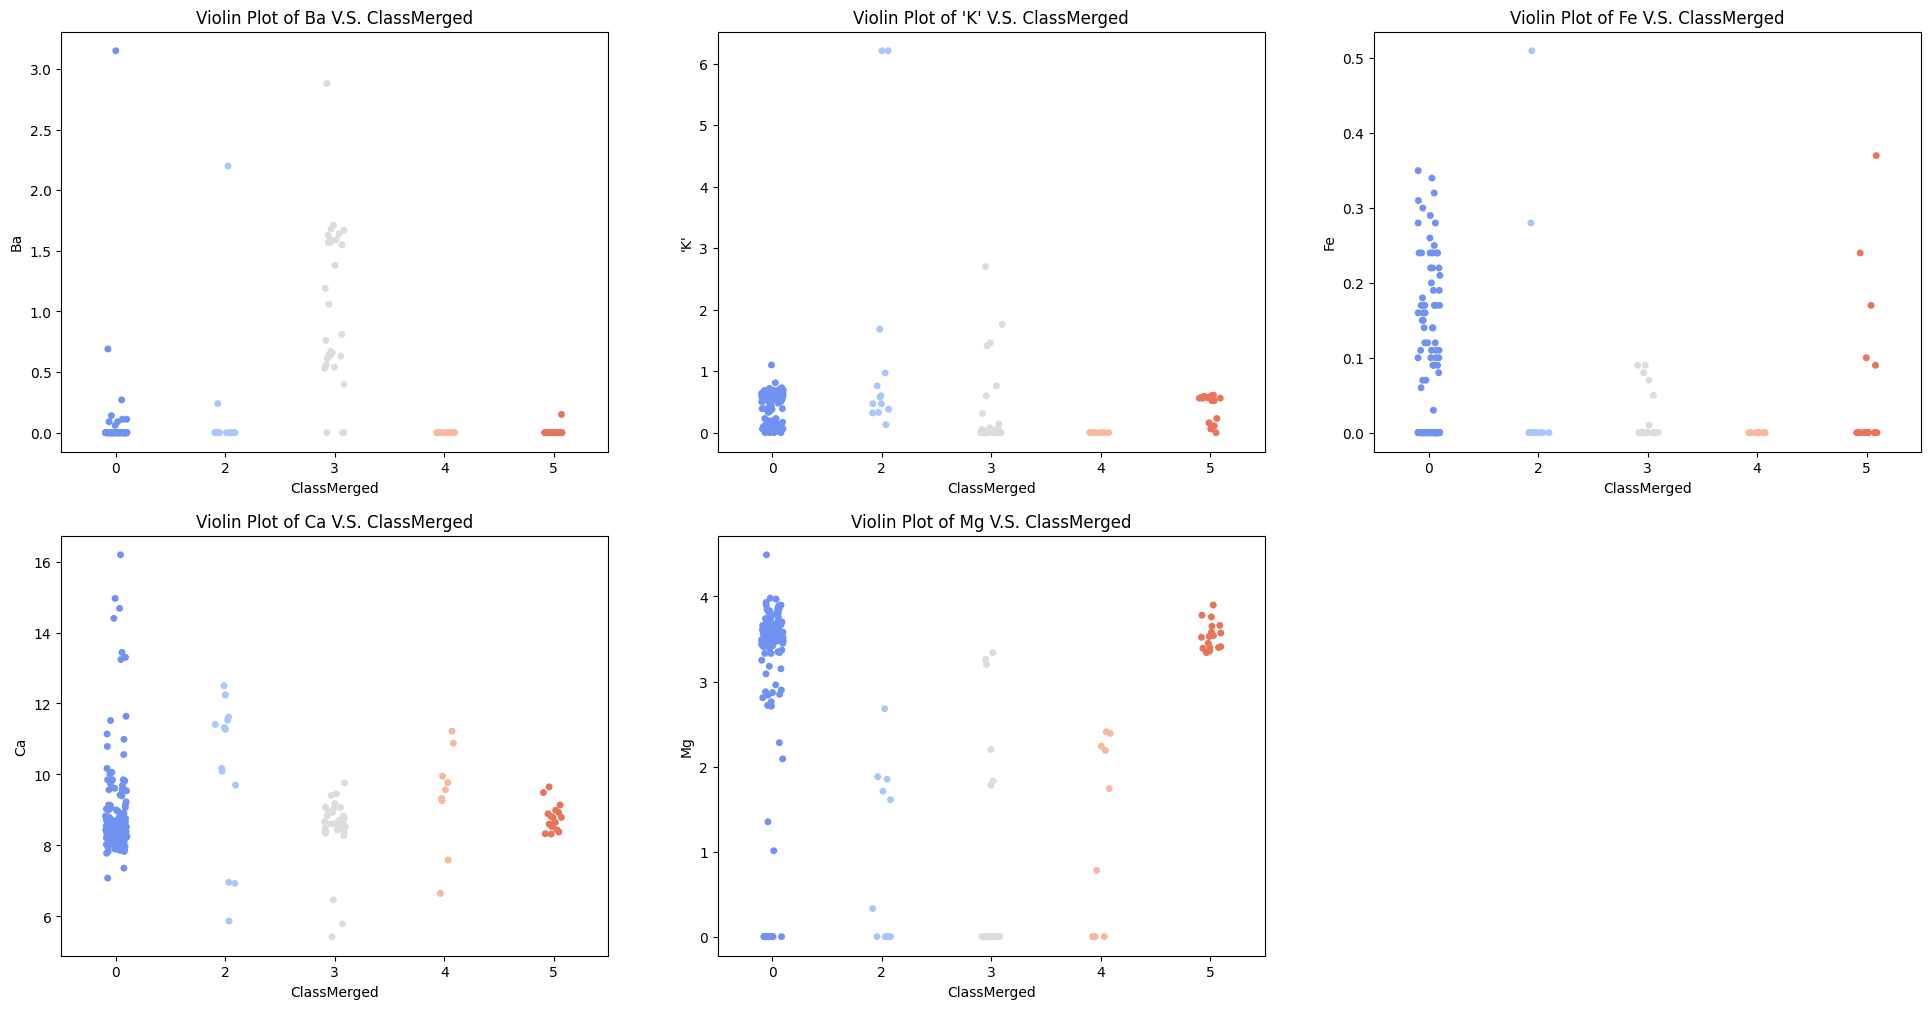

In [132]:
df["ClassMerged"] = df["ClassCode"].replace({0: 0, 1: 0})

fig, axes = plt.subplots(2, 3, figsize=(24, 12))
axes = axes.flatten()

fig.delaxes(axes[-1])

for idx, feature in enumerate(top_features):
    sns.stripplot(y=df[feature], x=df["ClassMerged"], ax=axes[idx], palette="coolwarm")
    axes[idx].set_title(f"Violin Plot of {feature} V.S. ClassMerged")

In [133]:
print(df["ClassMerged"].value_counts(),
df["Class"].value_counts())

ClassMerged
0    146
3     29
5     17
2     13
4      9
Name: count, dtype: int64 Class
b'build_wind_non-float'    76
b'build_wind_float'        70
b'headlamps'               29
b'vehic_wind_float'        17
b'containers'              13
b'tableware'                9
Name: count, dtype: int64


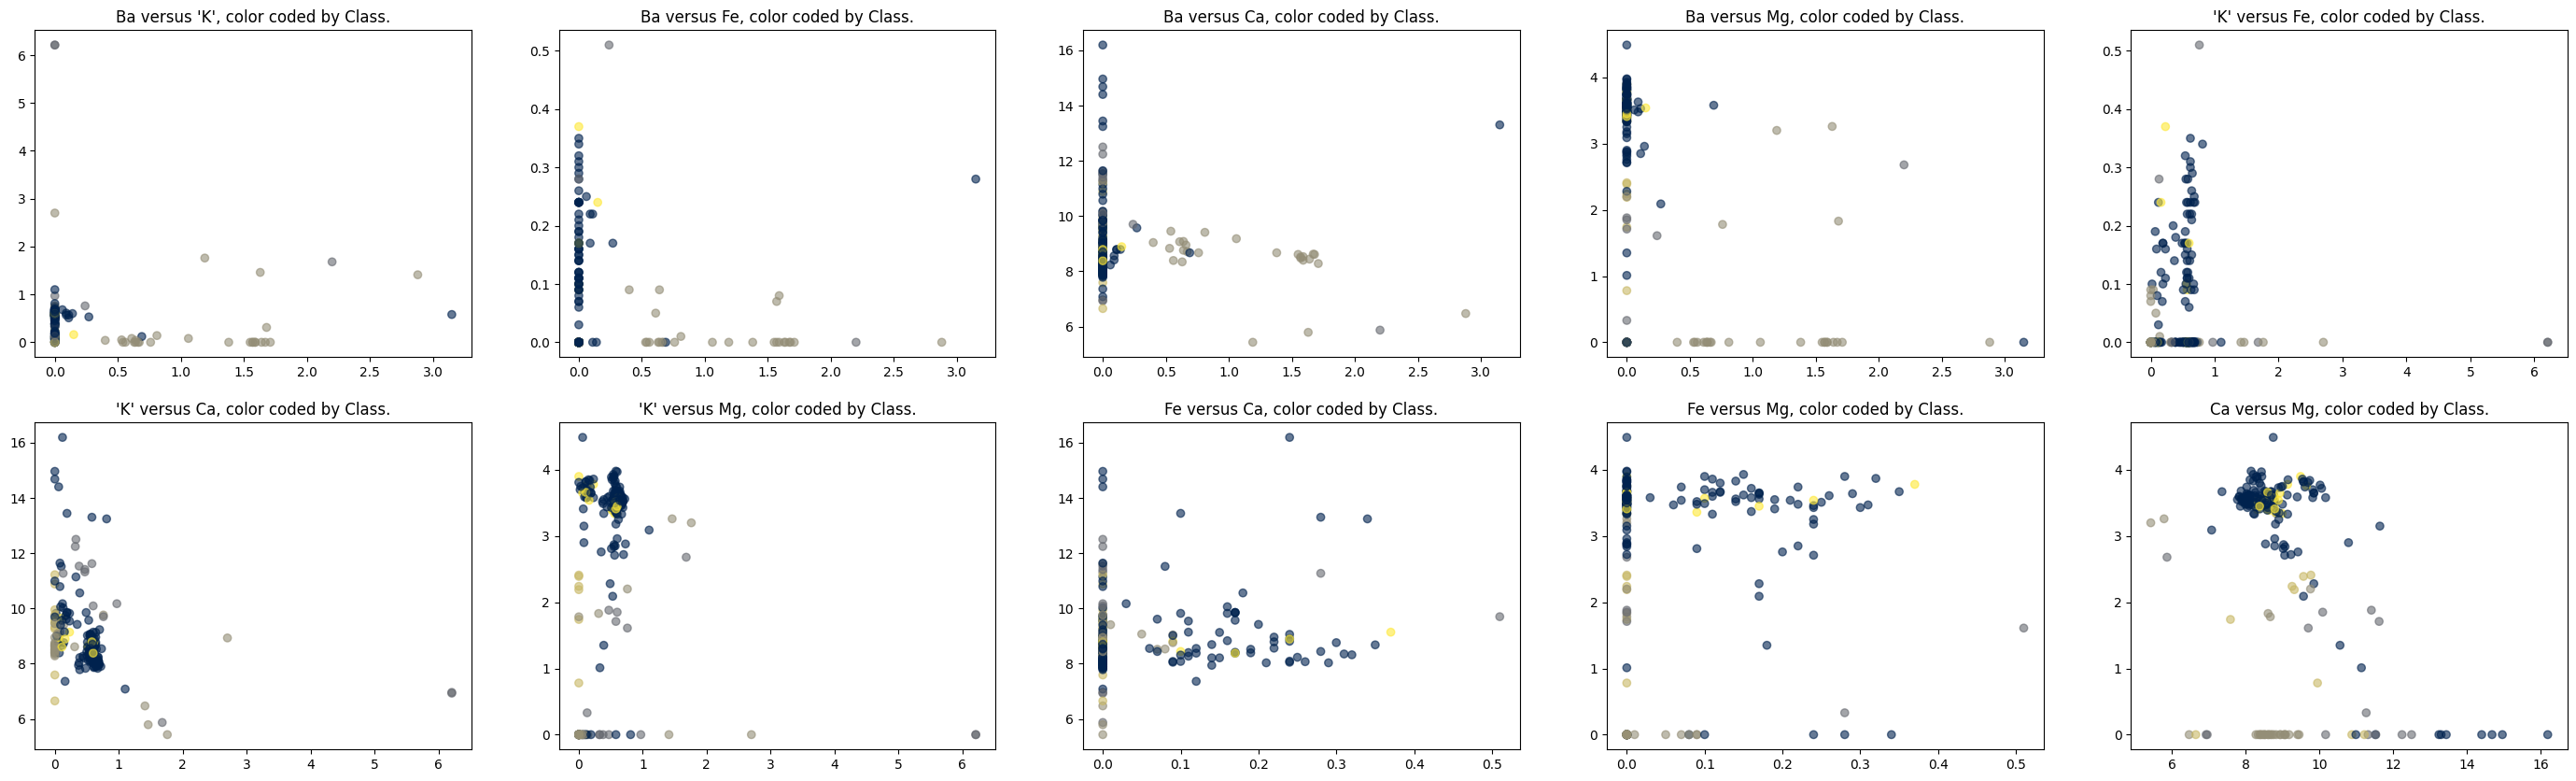

In [134]:
fig, axes = plt.subplots(2, 5, figsize=(35, 10))
axes = axes.flatten()

n = len(top_features)

count = 0
for i in range(n):
    for j in range(i + 1, n):
        f1, f2 = top_features[i], top_features[j]
        axes[count].scatter(df[f1], df[f2], c=df["ClassMerged"], cmap="cividis", alpha=0.6)
        axes[count].set_title(f"{f1} versus {f2}, color coded by Class.")
        count += 1

Text(0.5, 1.0, 'T-SNE interpretation of the Model with Ground Truth Labels')

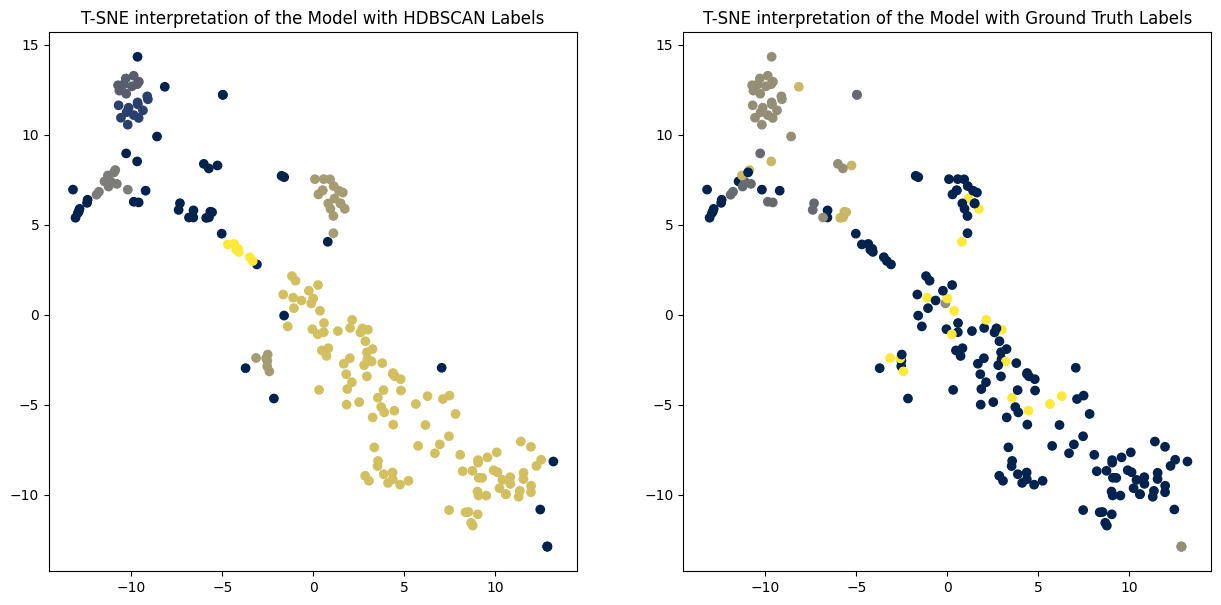

In [135]:
hdbscan_model = skl.cluster.HDBSCAN()
hdbscan_model.fit(X[top_features])
labels = hdbscan_model.labels_ 

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes = axes.flatten()

tsne_model = skl.manifold.TSNE(n_components=2)
X_tsne = tsne_model.fit_transform(X[top_features])

axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="cividis")
axes[0].set_title("T-SNE interpretation of the Model with HDBSCAN Labels")

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["ClassMerged"], cmap="cividis")
axes[1].set_title("T-SNE interpretation of the Model with Ground Truth Labels")

In [136]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, normalized_mutual_info_score

metrics = {
    "Silhouette Score": [silhouette_score(X, labels)],
    "Davies-Bouldin Score": [davies_bouldin_score(X, labels)],
    "Calinski-Harabasz Score": [calinski_harabasz_score(X, labels)],
    "NMI Score": [normalized_mutual_info_score(labels_pred=labels, labels_true=df["ClassMerged"])]
}

model = ["HDBSCAN"]

print(metrics.keys())

metrics_df = pd.DataFrame(metrics, columns=['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score', 'NMI Score'], index=model)

metrics_df.head()


dict_keys(['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score', 'NMI Score'])


Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  NMI Score
HDBSCAN          0.192178              1.780666                30.799484   0.375829

In [137]:
def metric_evaluation(name:str, X, labels, dataframe=metrics_df):
    dataframe.loc[name] = [silhouette_score(X, labels), davies_bouldin_score(X, labels), calinski_harabasz_score(X, labels), normalized_mutual_info_score(labels_pred=labels, labels_true=df["ClassMerged"])]
    print("Metrics evaluated!")
    print(dataframe.head())

def dfless_metric_evaluation(X, labels):
    array_of_metrics = [silhouette_score(X, labels), davies_bouldin_score(X, labels), calinski_harabasz_score(X, labels), normalized_mutual_info_score(labels_pred=labels, labels_true=df["ClassMerged"])]
    return array_of_metrics

In [138]:
gmm_model = skl.mixture.GaussianMixture(n_components=len(df["ClassMerged"].unique()))

X_pca = skl.decomposition.PCA(n_components=2).fit_transform(X[top_features])

gmm_labels = gmm_model.fit_predict(X_pca)

dfless_metric_evaluation(X=X_pca, labels=gmm_labels)

[0.5161869784978003, 0.79457815634493, 213.65511386383608, 0.41319462742102303]

In [139]:
gmm_sweep = pd.DataFrame(columns=['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score', 'NMI Score'], index=["0"])

components = np.arange(2, 32, 1)
print(len(components))

for n_comp in components:
    gmm_model = skl.mixture.GaussianMixture(n_components=n_comp)
    gmm_lables = gmm_model.fit_predict(X_pca)
    aom = dfless_metric_evaluation(X=X_pca, labels=gmm_lables)

    gmm_sweep.loc[f"GMM with {n_comp} components"] = aom

gmm_sweep = gmm_sweep.drop(index="0")
gmm_sweep.head()

30


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4140\2480631308.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gmm_sweep.loc[f"GMM with {n_comp} components"] = aom


Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  NMI Score
GMM with 2 components          0.540150              0.933094               157.680279   0.368285
GMM with 3 components          0.537510              1.389439               114.327689   0.409884
GMM with 4 components          0.453860              1.667568                96.874831   0.385326
GMM with 5 components          0.466261              1.153449               171.493712   0.407034
GMM with 6 components          0.481828              1.090933               186.755030   0.425618

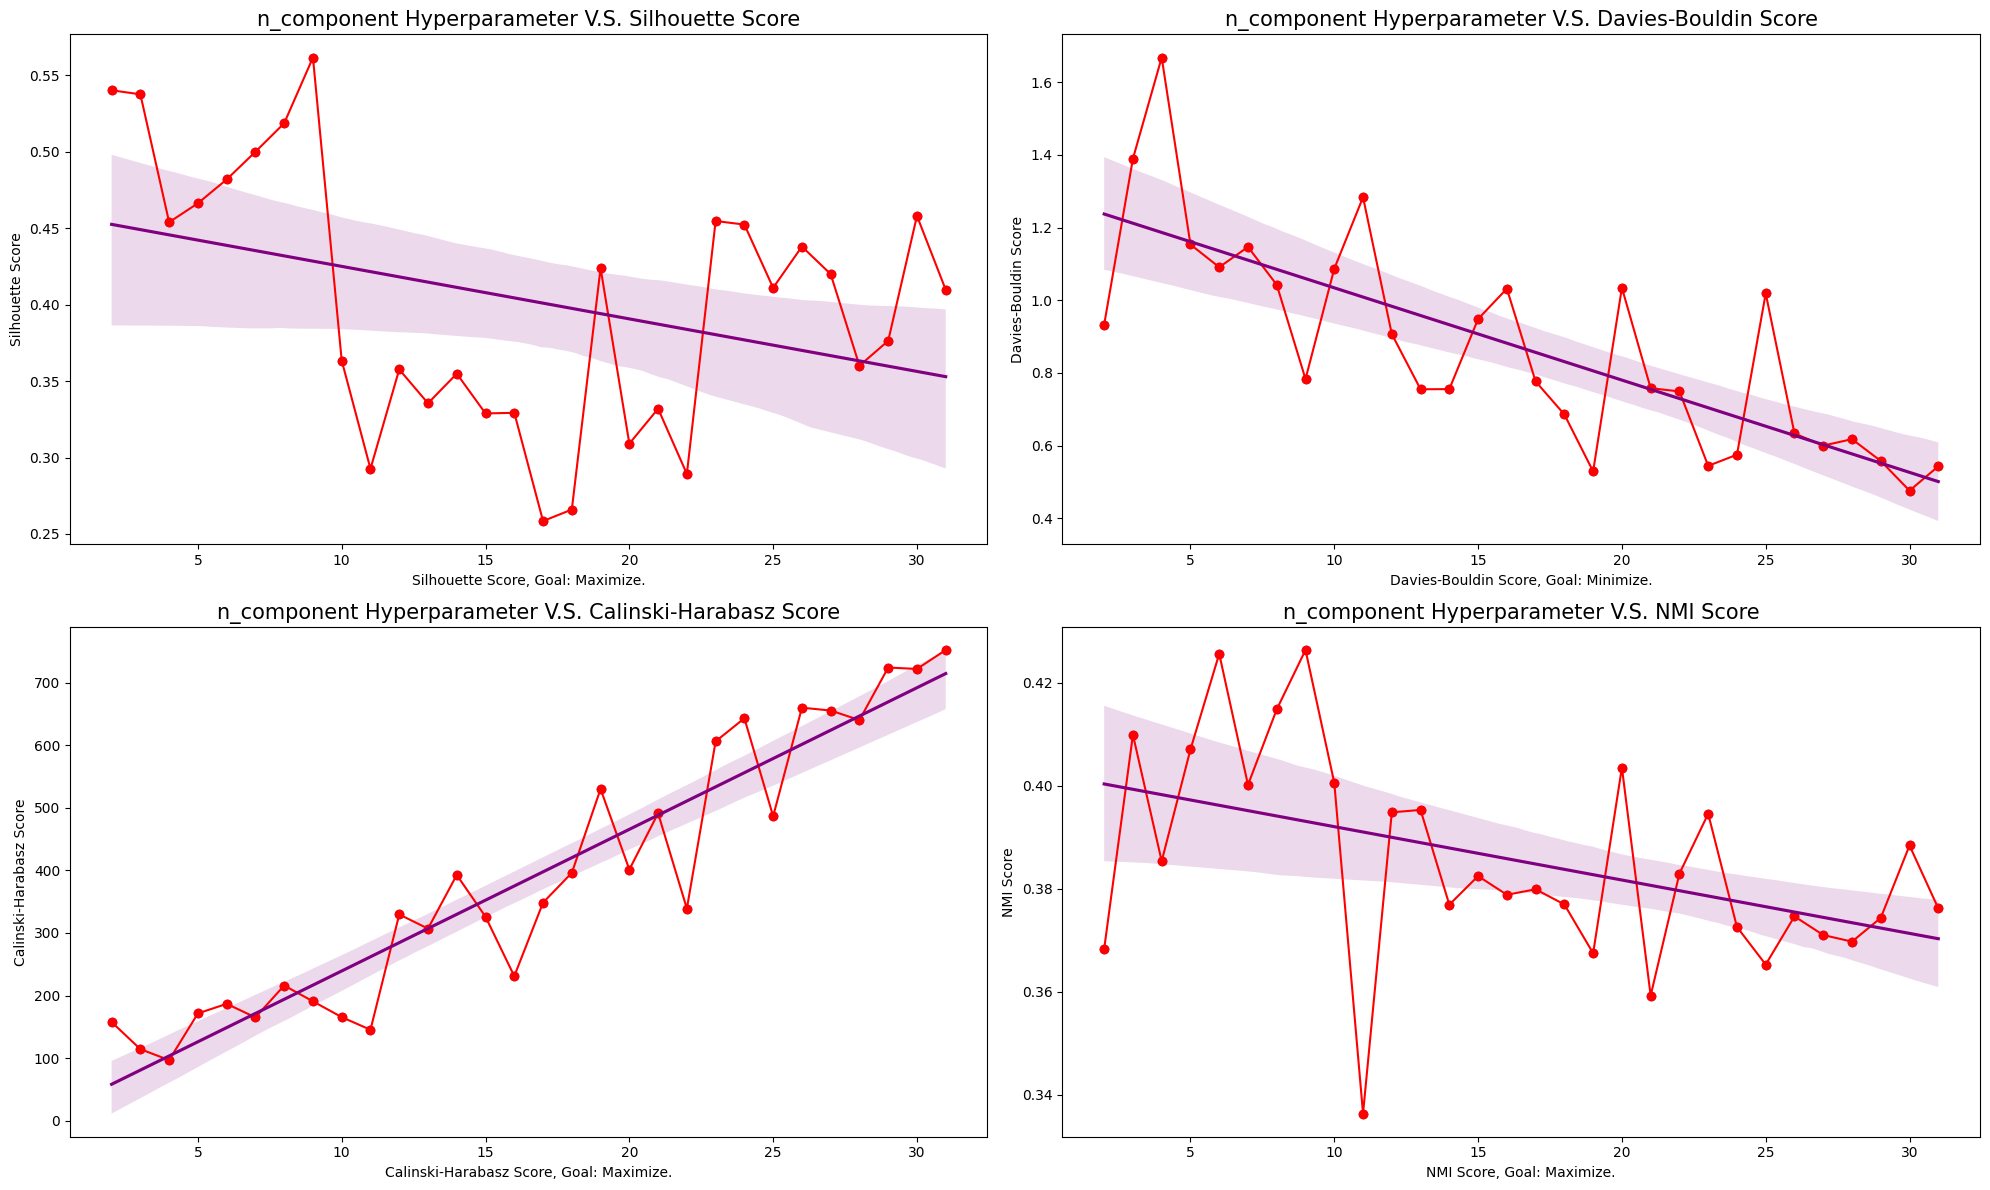

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

print(enumerate(gmm_sweep.columns))

for idx, column in enumerate(gmm_sweep.columns):    
    if idx == 1:
        axes[idx].plot(components, gmm_sweep[column], marker="o", color="red")
        axes[idx].set_title(f"n_component Hyperparameter V.S. {column}", size=15)
        axes[idx].set_xlabel(f"{column}, Goal: Minimize.")
    else: 
        axes[idx].plot(components, gmm_sweep[column], marker="o", color="red")
        axes[idx].set_title(f"n_component Hyperparameter V.S. {column}", size=15)
        axes[idx].set_xlabel(f"{column}, Goal: Maximize.")

    sns.regplot(x=components, y=gmm_sweep[column], color="purple", ax=axes[idx])

plt.tight_layout()
plt.show()

In [141]:
df.head()

RI     Na    Mg    Al     Si   'K'    Ca    Ba    Fe                    Class  ClassCode  ClassMerged
0  1.51567  13.29  3.45  1.21  72.74  0.56  8.57  0.00  0.00      b'build_wind_float'          0            0
1  1.52667  13.99  3.70  0.71  71.57  0.02  9.82  0.00  0.10      b'build_wind_float'          0            0
2  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.00            b'containers'          2            2
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00      b'build_wind_float'          0            0
4  1.52068  13.55  2.09  1.67  72.18  0.53  9.57  0.27  0.17  b'build_wind_non-float'          1            0

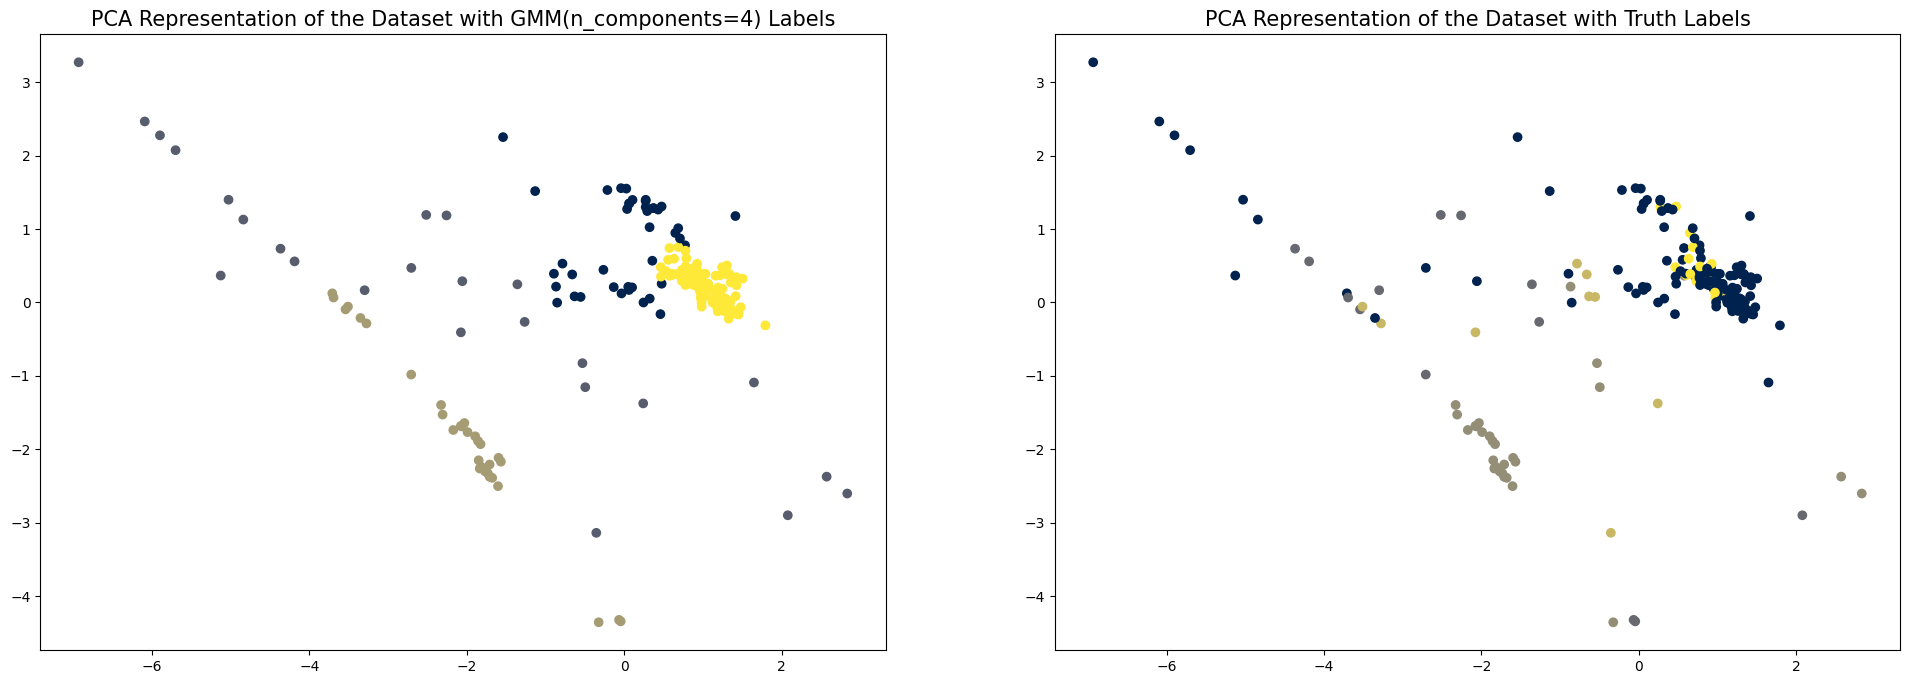

In [142]:
gmm_model = skl.mixture.GaussianMixture(n_components=4)

X_pca = skl.decomposition.PCA(n_components=2).fit_transform(X[top_features])

gmm_labels = gmm_model.fit_predict(X_pca)

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
axes = axes.flatten()

axes[0].set_title("PCA Representation of the Dataset with GMM(n_components=4) Labels", size=15)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap="cividis")

axes[1].set_title("PCA Representation of the Dataset with Truth Labels", size=15)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df["ClassMerged"], cmap="cividis")

metrics_df.loc["GMM with 4 n_components"] = dfless_metric_evaluation(X=X_pca, labels=gmm_labels)
metrics_df.head()

plt.show()

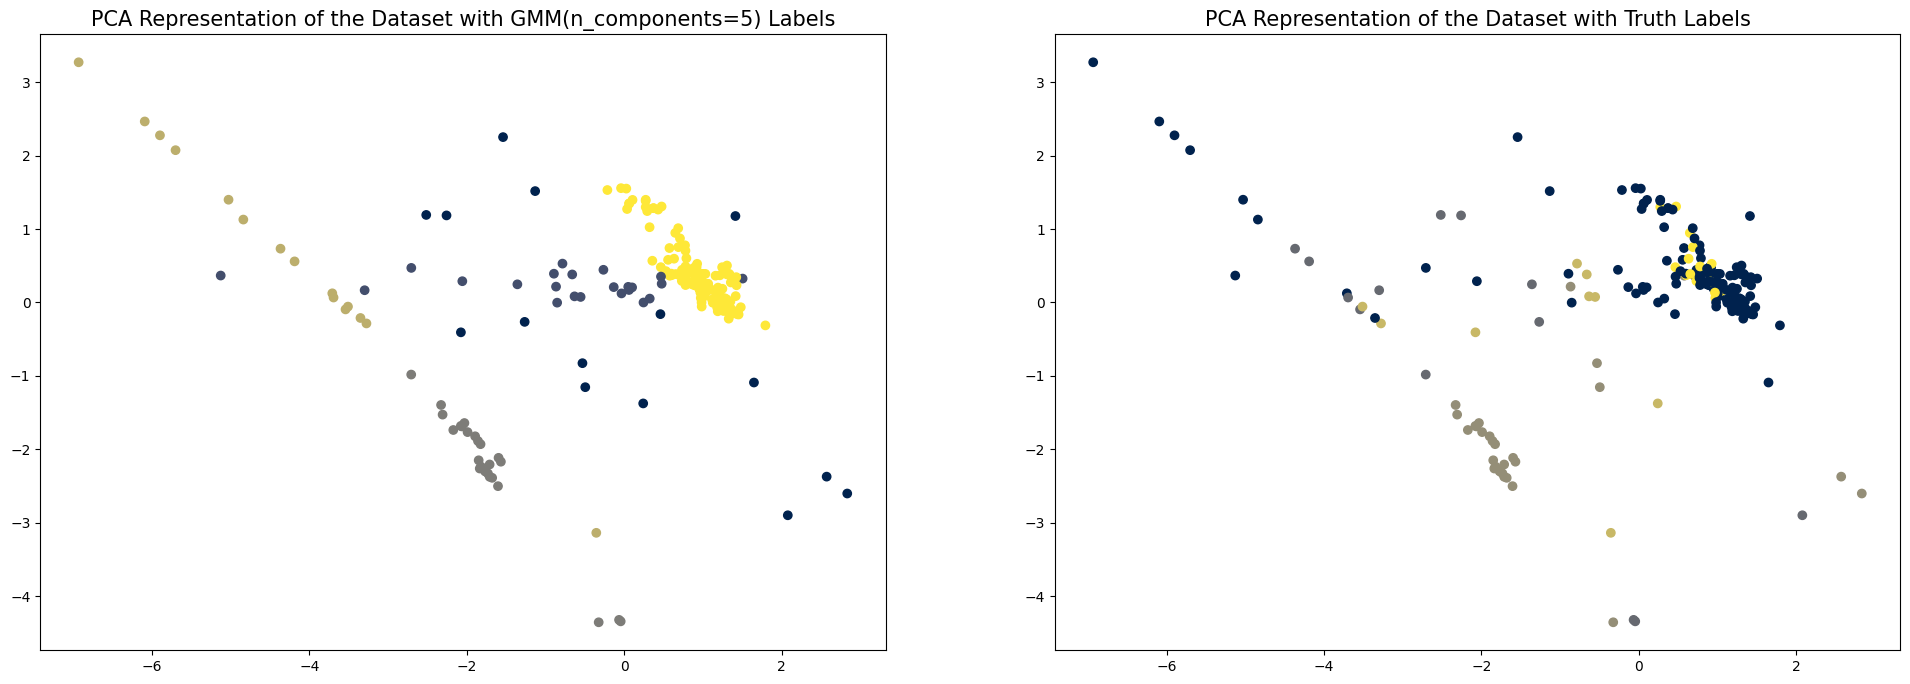

In [143]:
gmm_model = skl.mixture.GaussianMixture(n_components=len(df["ClassMerged"].unique()))

X_pca = skl.decomposition.PCA(n_components=2).fit_transform(X[top_features])

gmm_labels = gmm_model.fit_predict(X_pca)

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
axes = axes.flatten()

axes[0].set_title(f"PCA Representation of the Dataset with GMM(n_components={len(df["ClassMerged"].unique())}) Labels", size=15)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap="cividis")

axes[1].set_title("PCA Representation of the Dataset with Truth Labels", size=15)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df["ClassMerged"], cmap="cividis")

metrics_df.loc["GMM with 5 n_components"] = dfless_metric_evaluation(X=X_pca, labels=gmm_labels)
metrics_df.head()

plt.show()

In [144]:
metrics_df

Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  NMI Score
HDBSCAN                          0.192178              1.780666                30.799484   0.375829
GMM with 4 n_components          0.461060              1.577406               100.428927   0.359824
GMM with 5 n_components          0.489499              2.128143               125.636966   0.423744

In [145]:
class_count = len(df["ClassMerged"].unique())

In [146]:
spectral_cluster = skl.cluster.SpectralClustering(n_clusters=class_count)

# Baseline Model

spectral_cluster.fit(X[top_features])
sc_labels = spectral_cluster.labels_

aom_sc = dfless_metric_evaluation(X=X, labels=sc_labels)

print(aom_sc)

[0.5409886943124301, 0.5591638234500251, 70.99701266435824, 0.41078849529269185]


this shit sucks

In [147]:
n_clusters = range(4, 9)
n_neighbours = np.arange(5, 26, 5)

sc_sweep = pd.DataFrame(columns=['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score', 'NMI Score'])

for clusters, neighbors in iter.product(n_clusters, n_neighbours):
    sc = skl.cluster.SpectralClustering(n_clusters=clusters, n_neighbors=neighbors)
    sc.fit(X[top_features])
    labels = sc.labels_

    array_of_metrics = dfless_metric_evaluation(X=X[top_features], labels=labels)
    sc_sweep.loc[f"n_clusters = {clusters} ; n_neighbors = {neighbors}"] = array_of_metrics

for column in ['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score', 'NMI Score']:
    print("-"* 50, column, "-" * 50)
    if column== "Davies-Bouldin Score":
        print(sc_sweep.sort_values(by=column, ascending=True).head(2))
    else:
        print(sc_sweep.sort_values(by=column, ascending=False).head(2))
    
    print("\n")


-------------------------------------------------- Silhouette Score --------------------------------------------------
                                   Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  NMI Score
n_clusters = 6 ; n_neighbors = 5           0.654564              0.452673               171.200208   0.461789
n_clusters = 6 ; n_neighbors = 20          0.654564              0.452673               171.200208   0.461789


-------------------------------------------------- Davies-Bouldin Score --------------------------------------------------
                                   Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  NMI Score
n_clusters = 5 ; n_neighbors = 10          0.591875              0.418809                98.842568   0.410788
n_clusters = 5 ; n_neighbors = 20          0.591875              0.418809                98.842568   0.410788


-------------------------------------------------- Calinski-Harabasz Score -------------------

                                                    Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  \
HDBSCAN                                                     0.192178              1.780666                30.799484   
GMM with 4 n_components                                     0.461060              1.577406               100.428927   
GMM with 5 n_components                                     0.489499              2.128143               125.636966   
SpectralClustering(n_clusters = 6, n_neighbors ...          0.578905              0.701286                91.611618   

                                                    NMI Score  
HDBSCAN                                              0.375829  
GMM with 4 n_components                              0.359824  
GMM with 5 n_components                              0.423744  
SpectralClustering(n_clusters = 6, n_neighbors ...   0.461789  


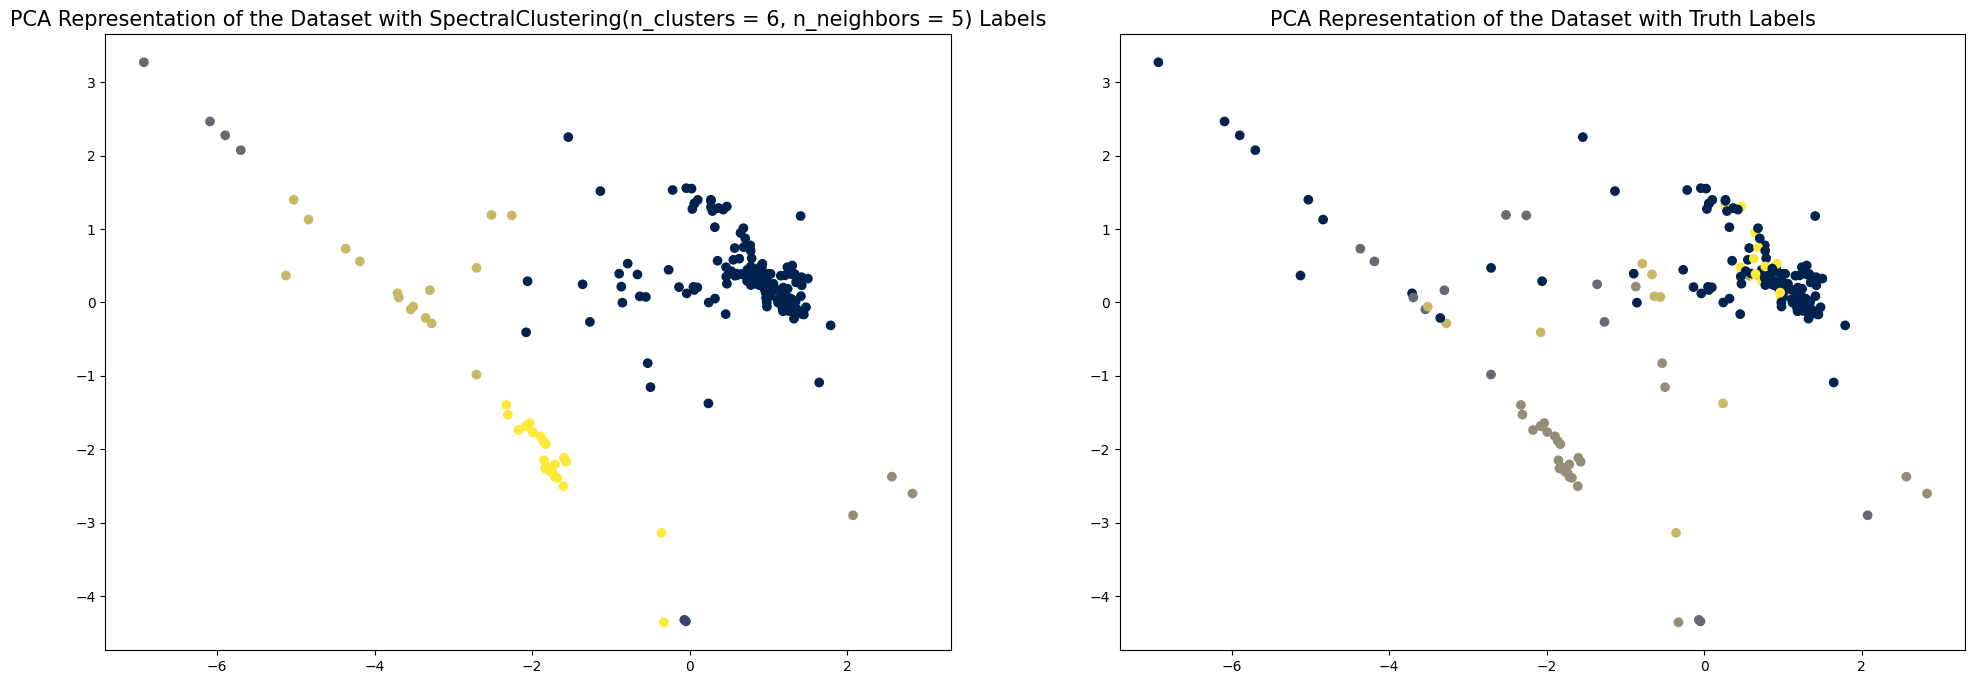

In [148]:
sc = skl.cluster.SpectralClustering(n_clusters=6, n_neighbors=5)
sc.fit(X[top_features])
labels = sc.labels_

X_pca = skl.decomposition.PCA(n_components=2).fit_transform(X[top_features])

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
axes = axes.flatten()

axes[0].set_title("PCA Representation of the Dataset with SpectralClustering(n_clusters = 6, n_neighbors = 5) Labels", size=15)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="cividis")

axes[1].set_title("PCA Representation of the Dataset with Truth Labels", size=15)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df["ClassMerged"], cmap="cividis")

metrics_df.loc["SpectralClustering(n_clusters = 6, n_neighbors = 5)"] = dfless_metric_evaluation(X=X, labels=labels)
print(metrics_df.head())

plt.show()

In [149]:
metrics_df.head()

Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  \
HDBSCAN                                                     0.192178              1.780666                30.799484   
GMM with 4 n_components                                     0.461060              1.577406               100.428927   
GMM with 5 n_components                                     0.489499              2.128143               125.636966   
SpectralClustering(n_clusters = 6, n_neighbors ...          0.578905              0.701286                91.611618   

                                                    NMI Score  
HDBSCAN                                              0.375829  
GMM with 4 n_components                              0.359824  
GMM with 5 n_components                              0.423744  
SpectralClustering(n_clusters = 6, n_neighbors ...   0.461789

In [150]:
kmeans_model = skl.cluster.MiniBatchKMeans(n_clusters=class_count)

kmeans_model.fit(X[top_features])
kmeans_label = kmeans_model.labels_

metrics_df.loc[f"MiniBatchKMeans with {class_count} n_clusters"] = dfless_metric_evaluation(X=X, labels=kmeans_label)

In [151]:
metrics_df.head()

Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  \
HDBSCAN                                                     0.192178              1.780666                30.799484   
GMM with 4 n_components                                     0.461060              1.577406               100.428927   
GMM with 5 n_components                                     0.489499              2.128143               125.636966   
SpectralClustering(n_clusters = 6, n_neighbors ...          0.578905              0.701286                91.611618   
MiniBatchKMeans with 5 n_clusters                           0.385748              1.132876               101.396656   

                                                    NMI Score  
HDBSCAN                                              0.375829  
GMM with 4 n_components                              0.359824  
GMM with 5 n_components                              0.423744  
SpectralClustering(n_clusters = 6, n_neighbors ...   0.461789  
MiniBatchKMeans with 5 n_clusters                    0.375112

In [152]:
def plot_clusters(dataframe, model_labels, truth_labels, model_name, features):
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    axes = axes.flatten()

    pca_model = skl.decomposition.PCA(n_components=2)
    X_pca = pca_model.fit_transform(dataframe[features])

    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=model_labels, cmap="cividis", s=40)
    axes[0].set_title(f"PCA Representation of the Dataset with {model_name} Labels")

    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=truth_labels, cmap="cividis", s=40)
    axes[1].set_title(f"PCA Representation of the Dataset with Ground Truth Labels")

    plt.show()

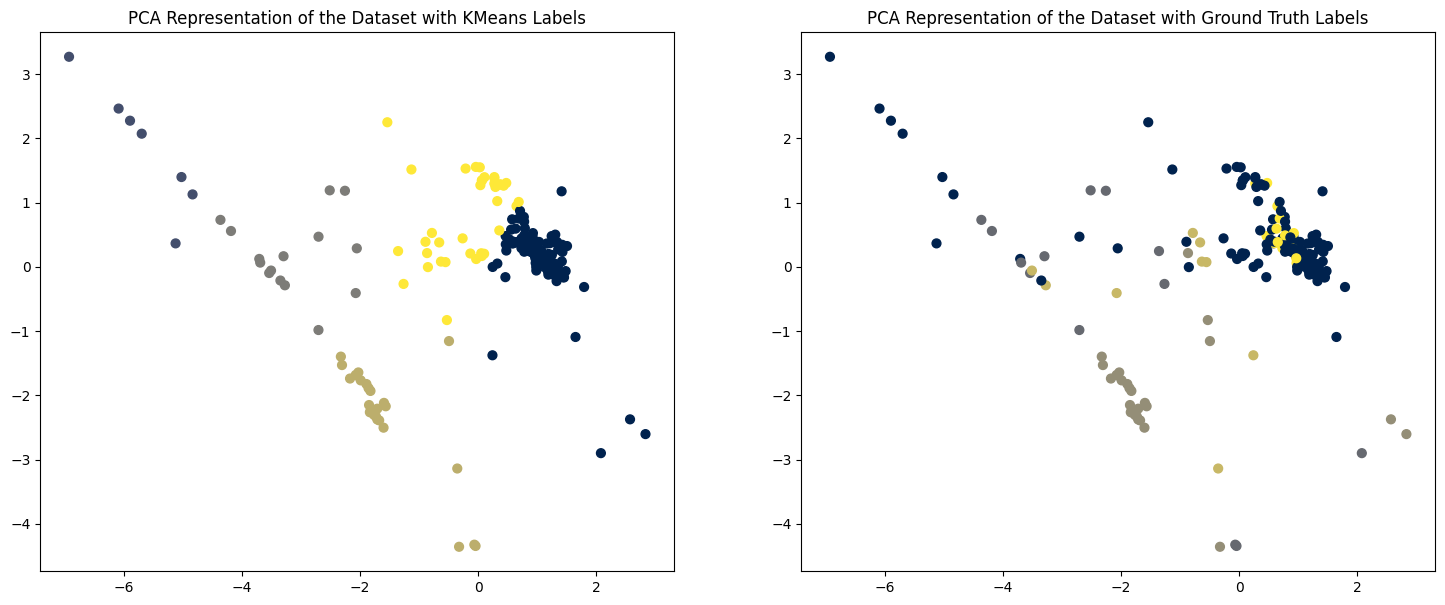

In [153]:
plot_clusters(dataframe=df, model_labels=kmeans_label, truth_labels=df["ClassMerged"], model_name="KMeans", features=top_features)

In [158]:
def clusters_by_chemical(df, features, model_labels, subplots: tuple, figsize: tuple):
    n_rows, n_cols = subplots
    
    n_features = len(features)
    amount_of_subplots = (n_features * (n_features - 1)) / 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    subplots_bool = n_rows * n_cols < amount_of_subplots
    assert not subplots_bool, f"You have given {abs(n_rows * n_cols - amount_of_subplots)} less subplots than intended."
    
    count = 0
    for i in range(n_features):
        for j in range(i + 1, n_features):
            f1, f2 = features[i], features[j]
            axes[count].scatter(df[f1], df[f2], c=model_labels, cmap="cividis", alpha=0.6)
            axes[count].set_title(f"{f1} versus {f2}, color coded by labels given by the model.", size=8)
            axes[count].set_ylabel(f"{f2}", size=10)
            axes[count].set_xlabel(f"{f1}", size=10)
            count += 1

    plt.show()

In [159]:
df.columns
all_features = df.columns[:-3]
print(all_features)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', ''K'', 'Ca', 'Ba', 'Fe'], dtype='object')


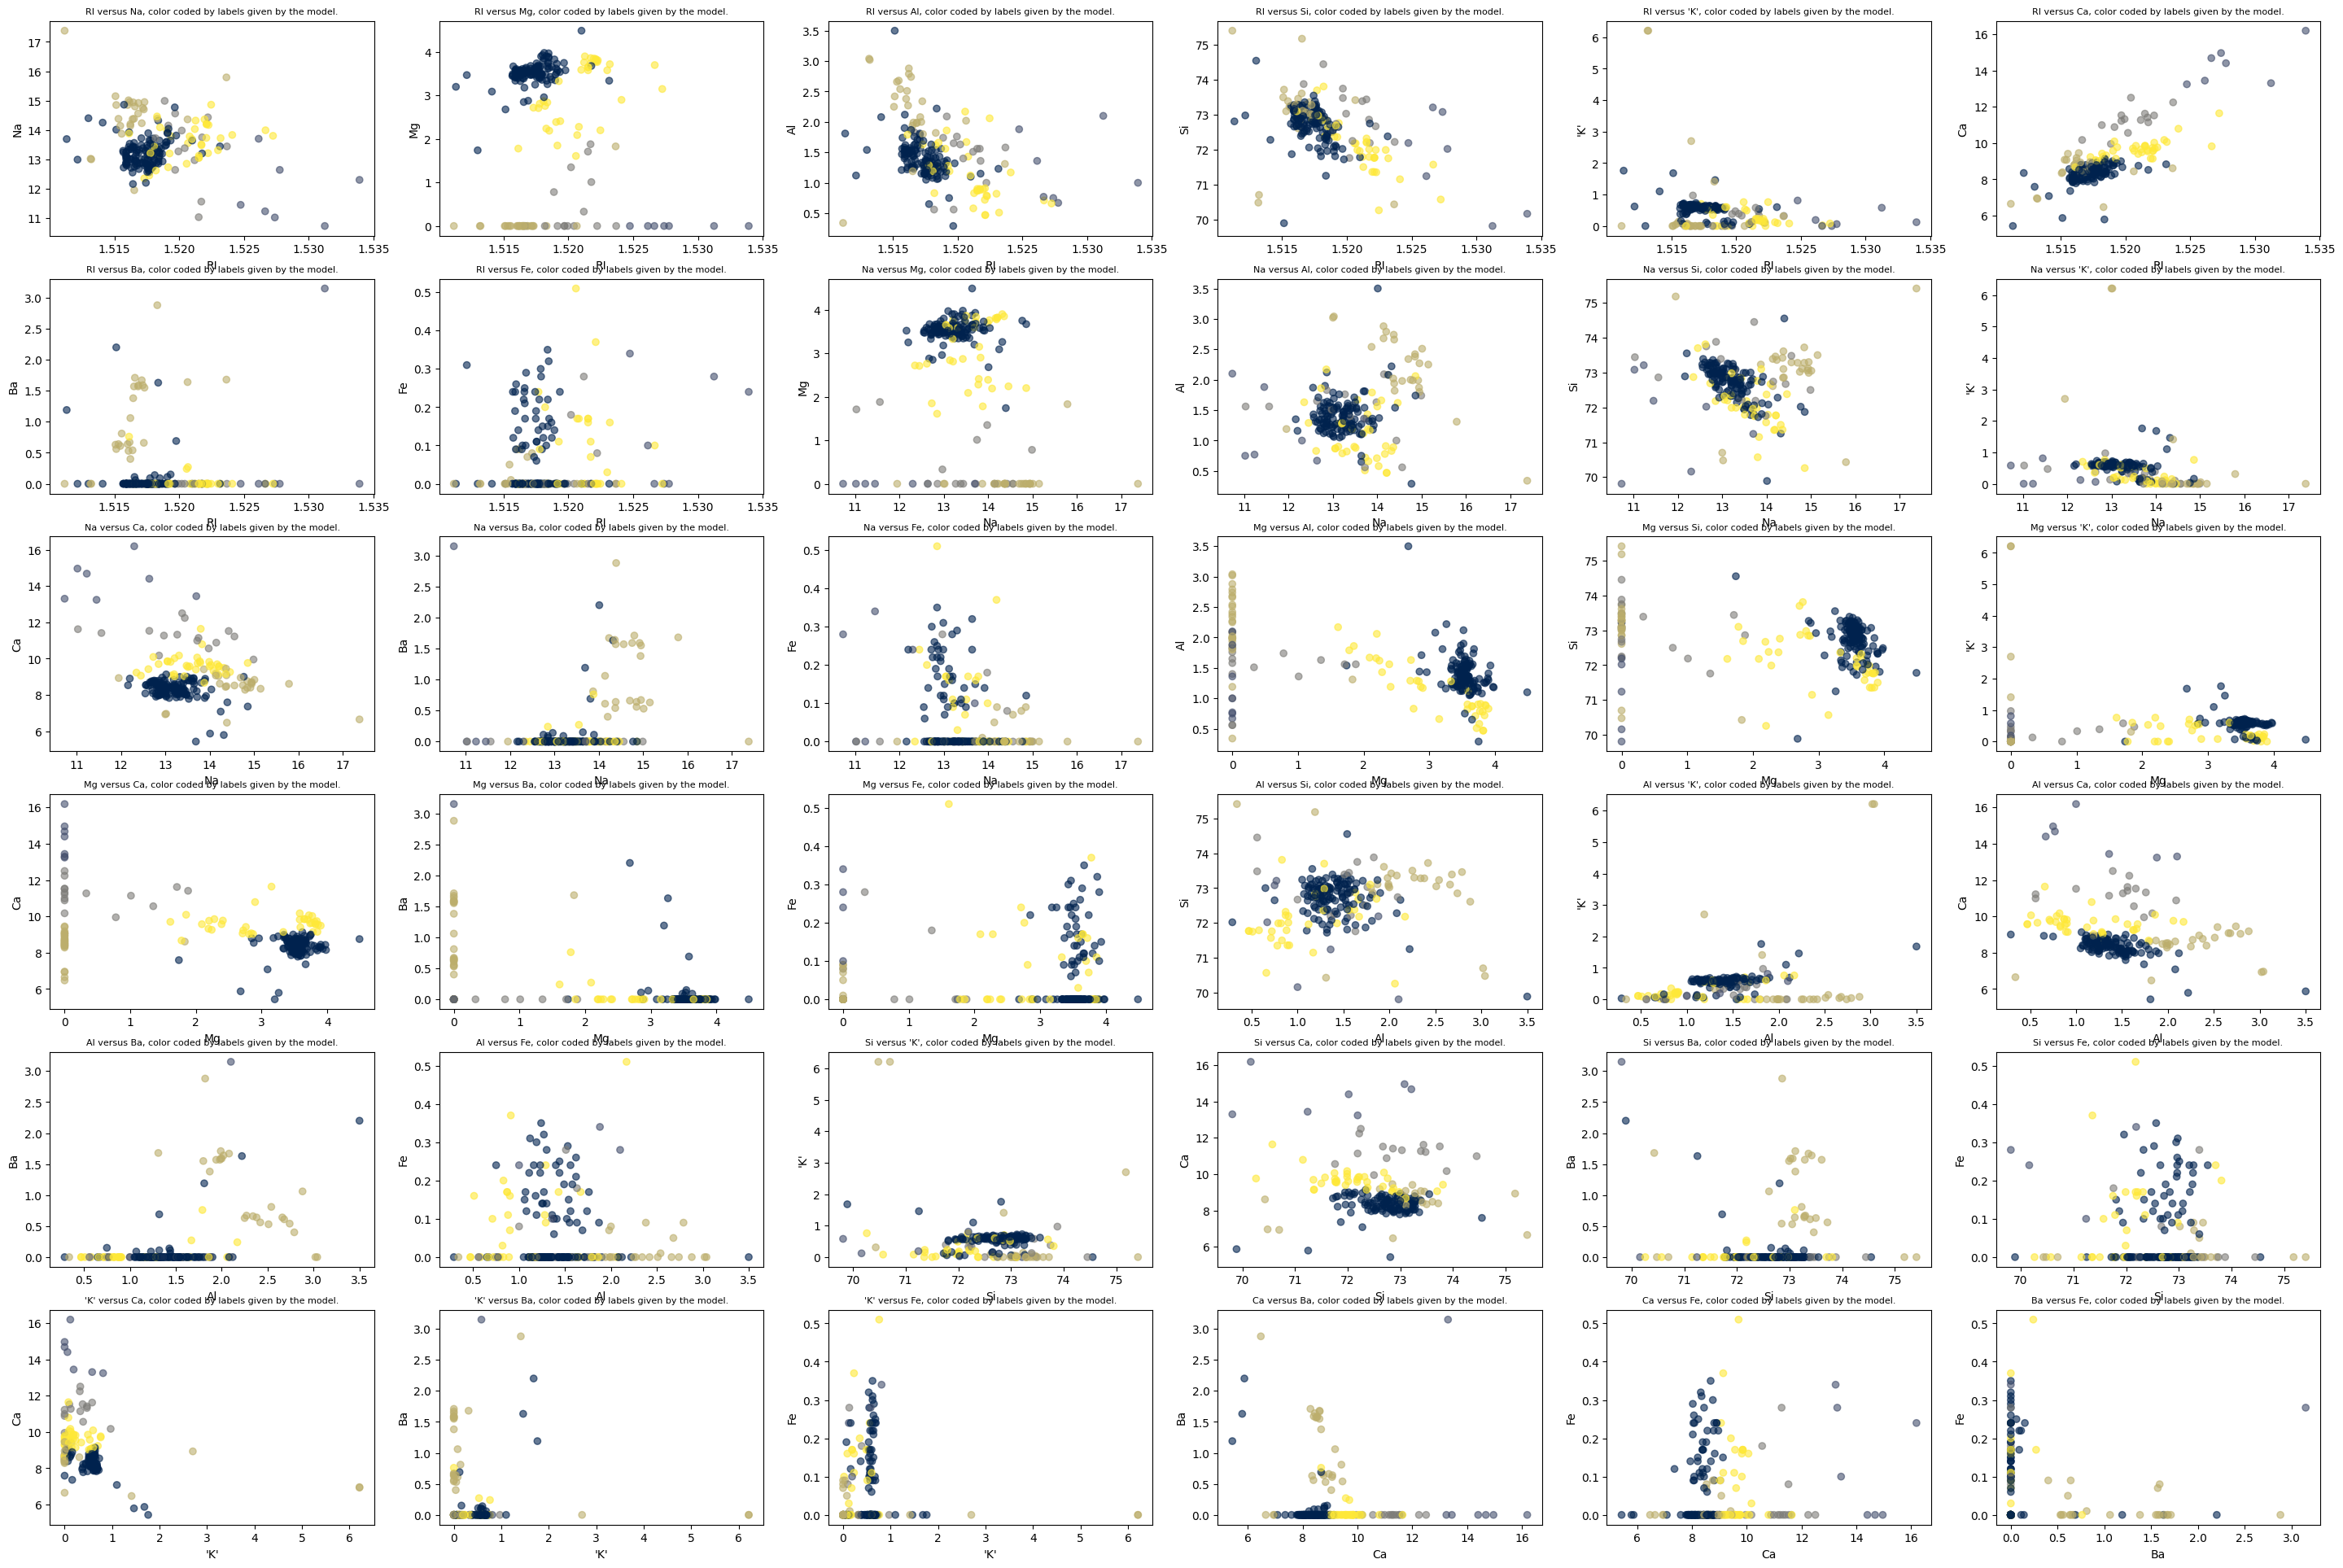

In [164]:
clusters_by_chemical(df=df, features=all_features, model_labels=kmeans_label, subplots=(6, 6), figsize=(36, 24))

In [165]:
gmm_model = skl.mixture.GaussianMixture(n_components=5)

X_pca = skl.decomposition.PCA(n_components=2).fit_transform(X[top_features])

gmm_labels_5comp = gmm_model.fit_predict(X_pca)

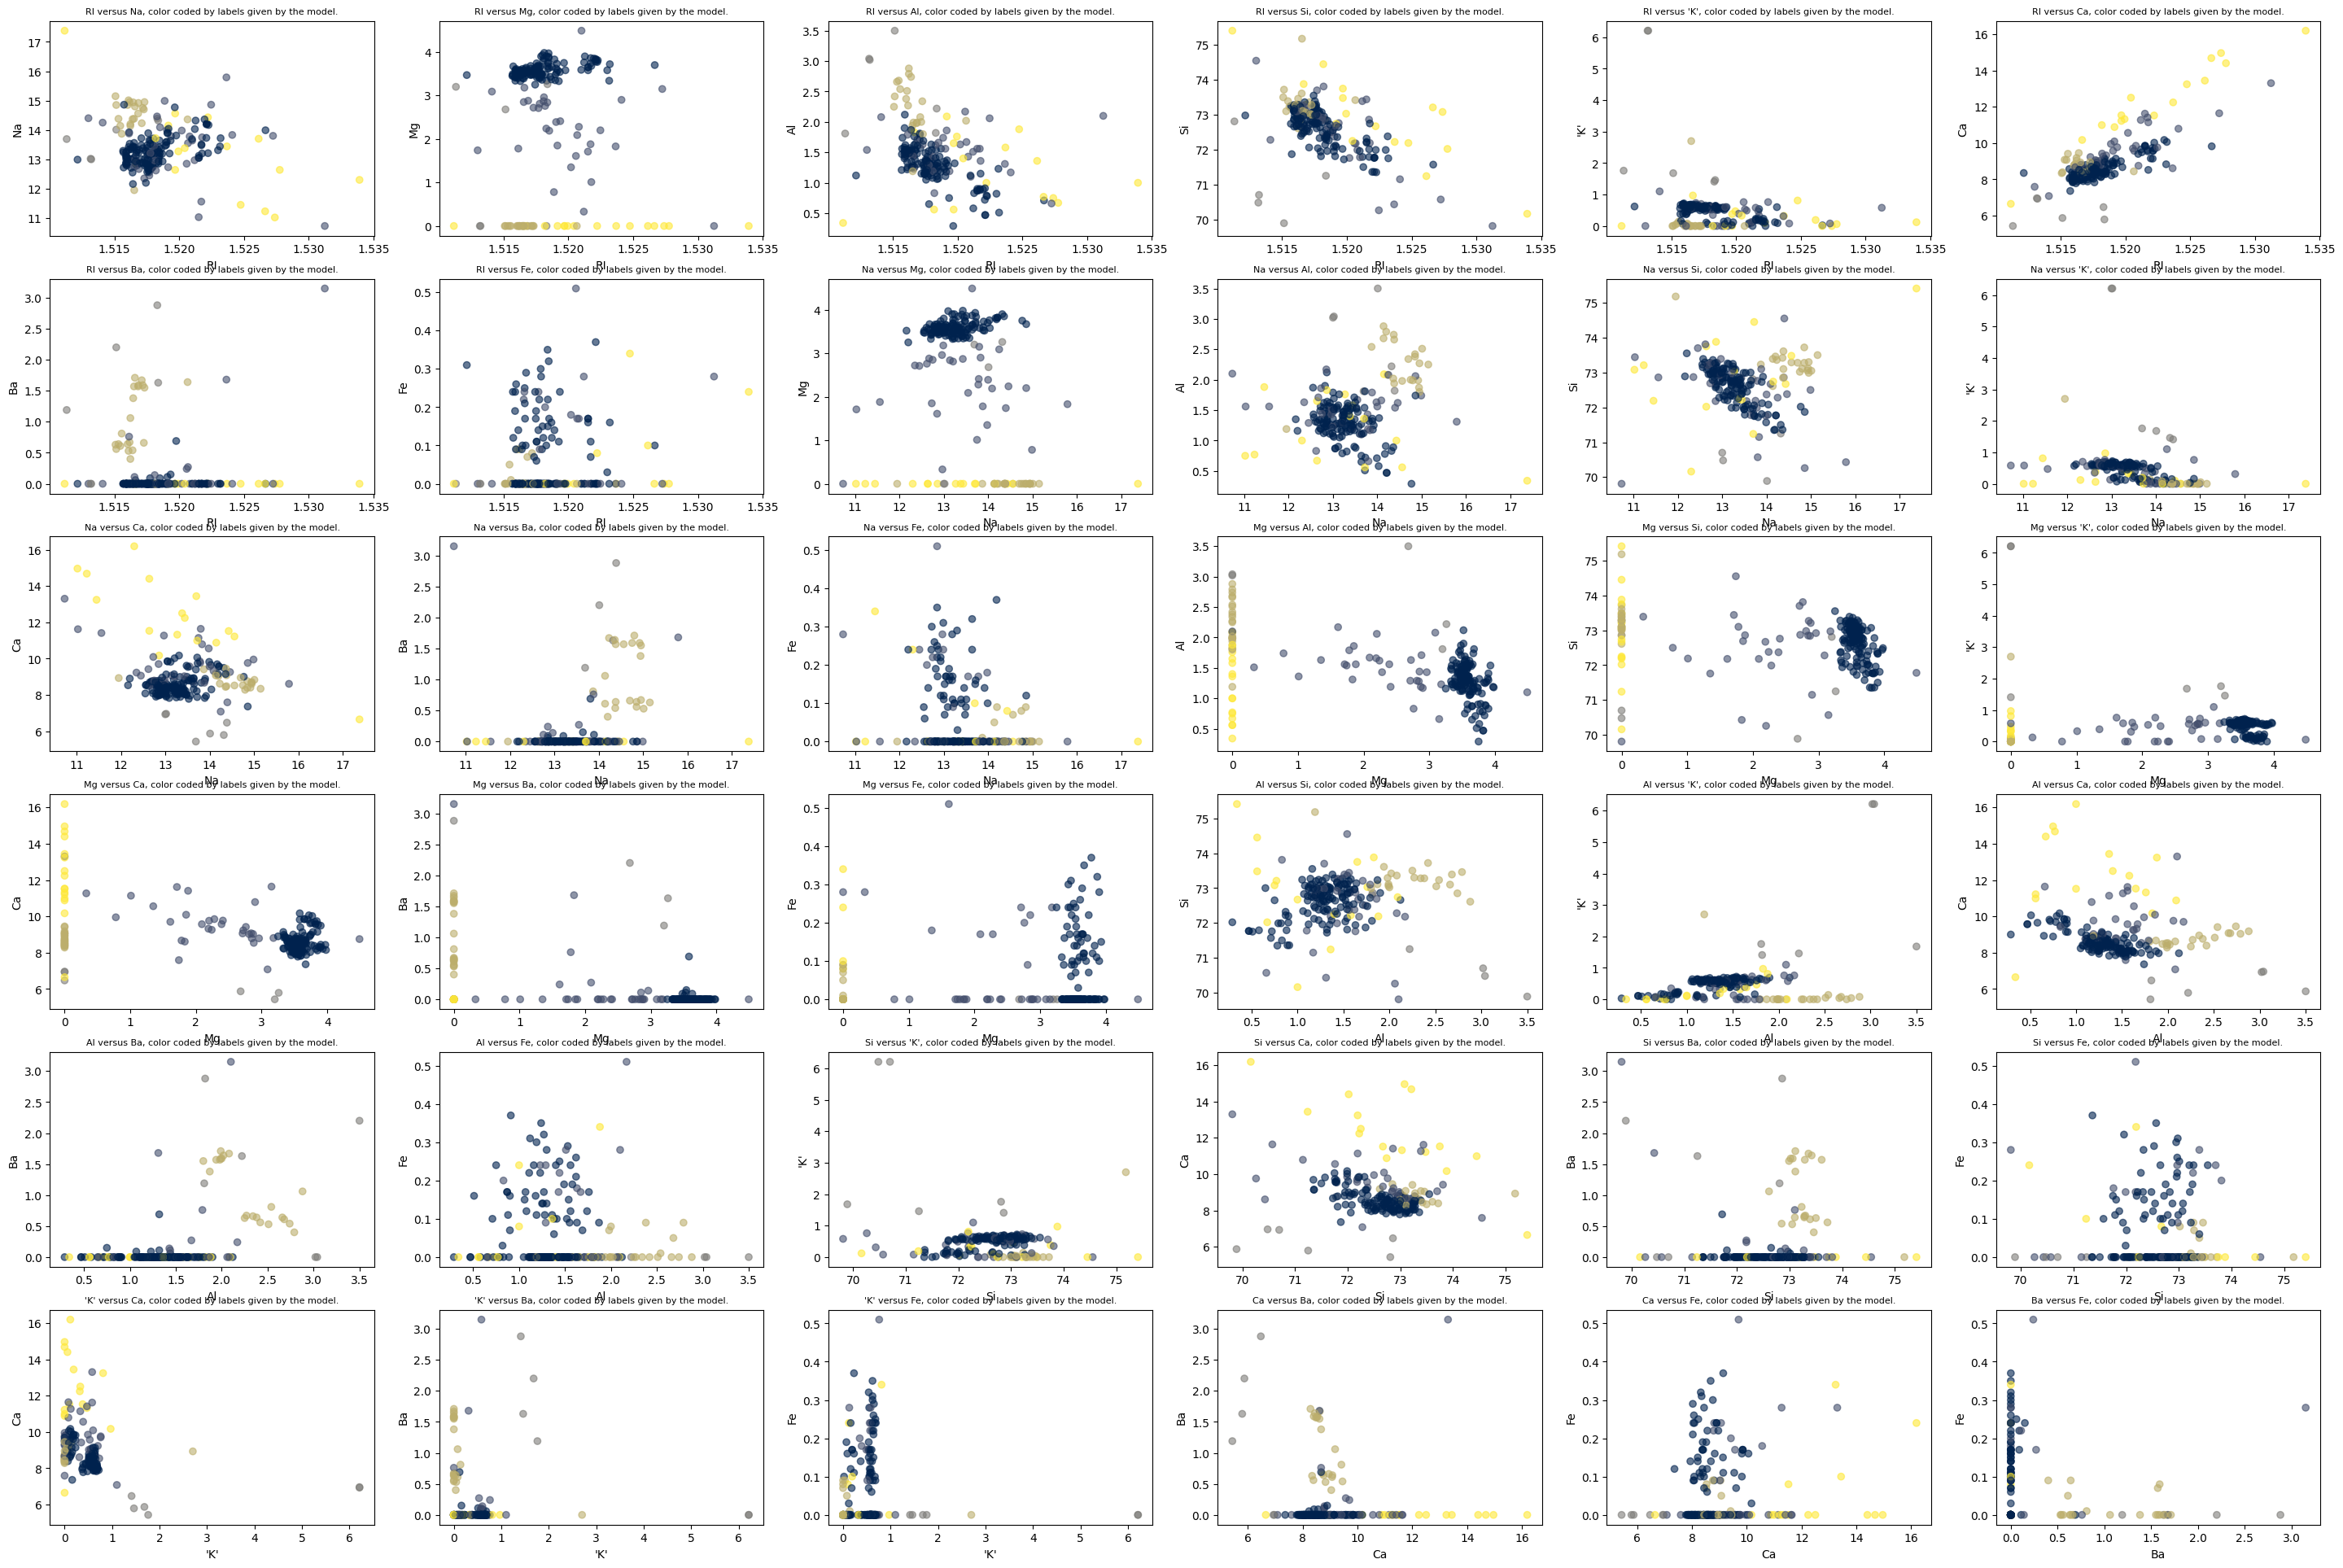

In [166]:
clusters_by_chemical(df=df, features=all_features, model_labels=gmm_labels_5comp, subplots=(6, 6), figsize=(36, 24))

In [167]:
metrics_df.head()

Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  \
HDBSCAN                                                     0.192178              1.780666                30.799484   
GMM with 4 n_components                                     0.461060              1.577406               100.428927   
GMM with 5 n_components                                     0.489499              2.128143               125.636966   
SpectralClustering(n_clusters = 6, n_neighbors ...          0.578905              0.701286                91.611618   
MiniBatchKMeans with 5 n_clusters                           0.385748              1.132876               101.396656   

                                                    NMI Score  
HDBSCAN                                              0.375829  
GMM with 4 n_components                              0.359824  
GMM with 5 n_components                              0.423744  
SpectralClustering(n_clusters = 6, n_neighbors ...   0.461789  
MiniBatchKMeans with 5 n_clusters                    0.375112

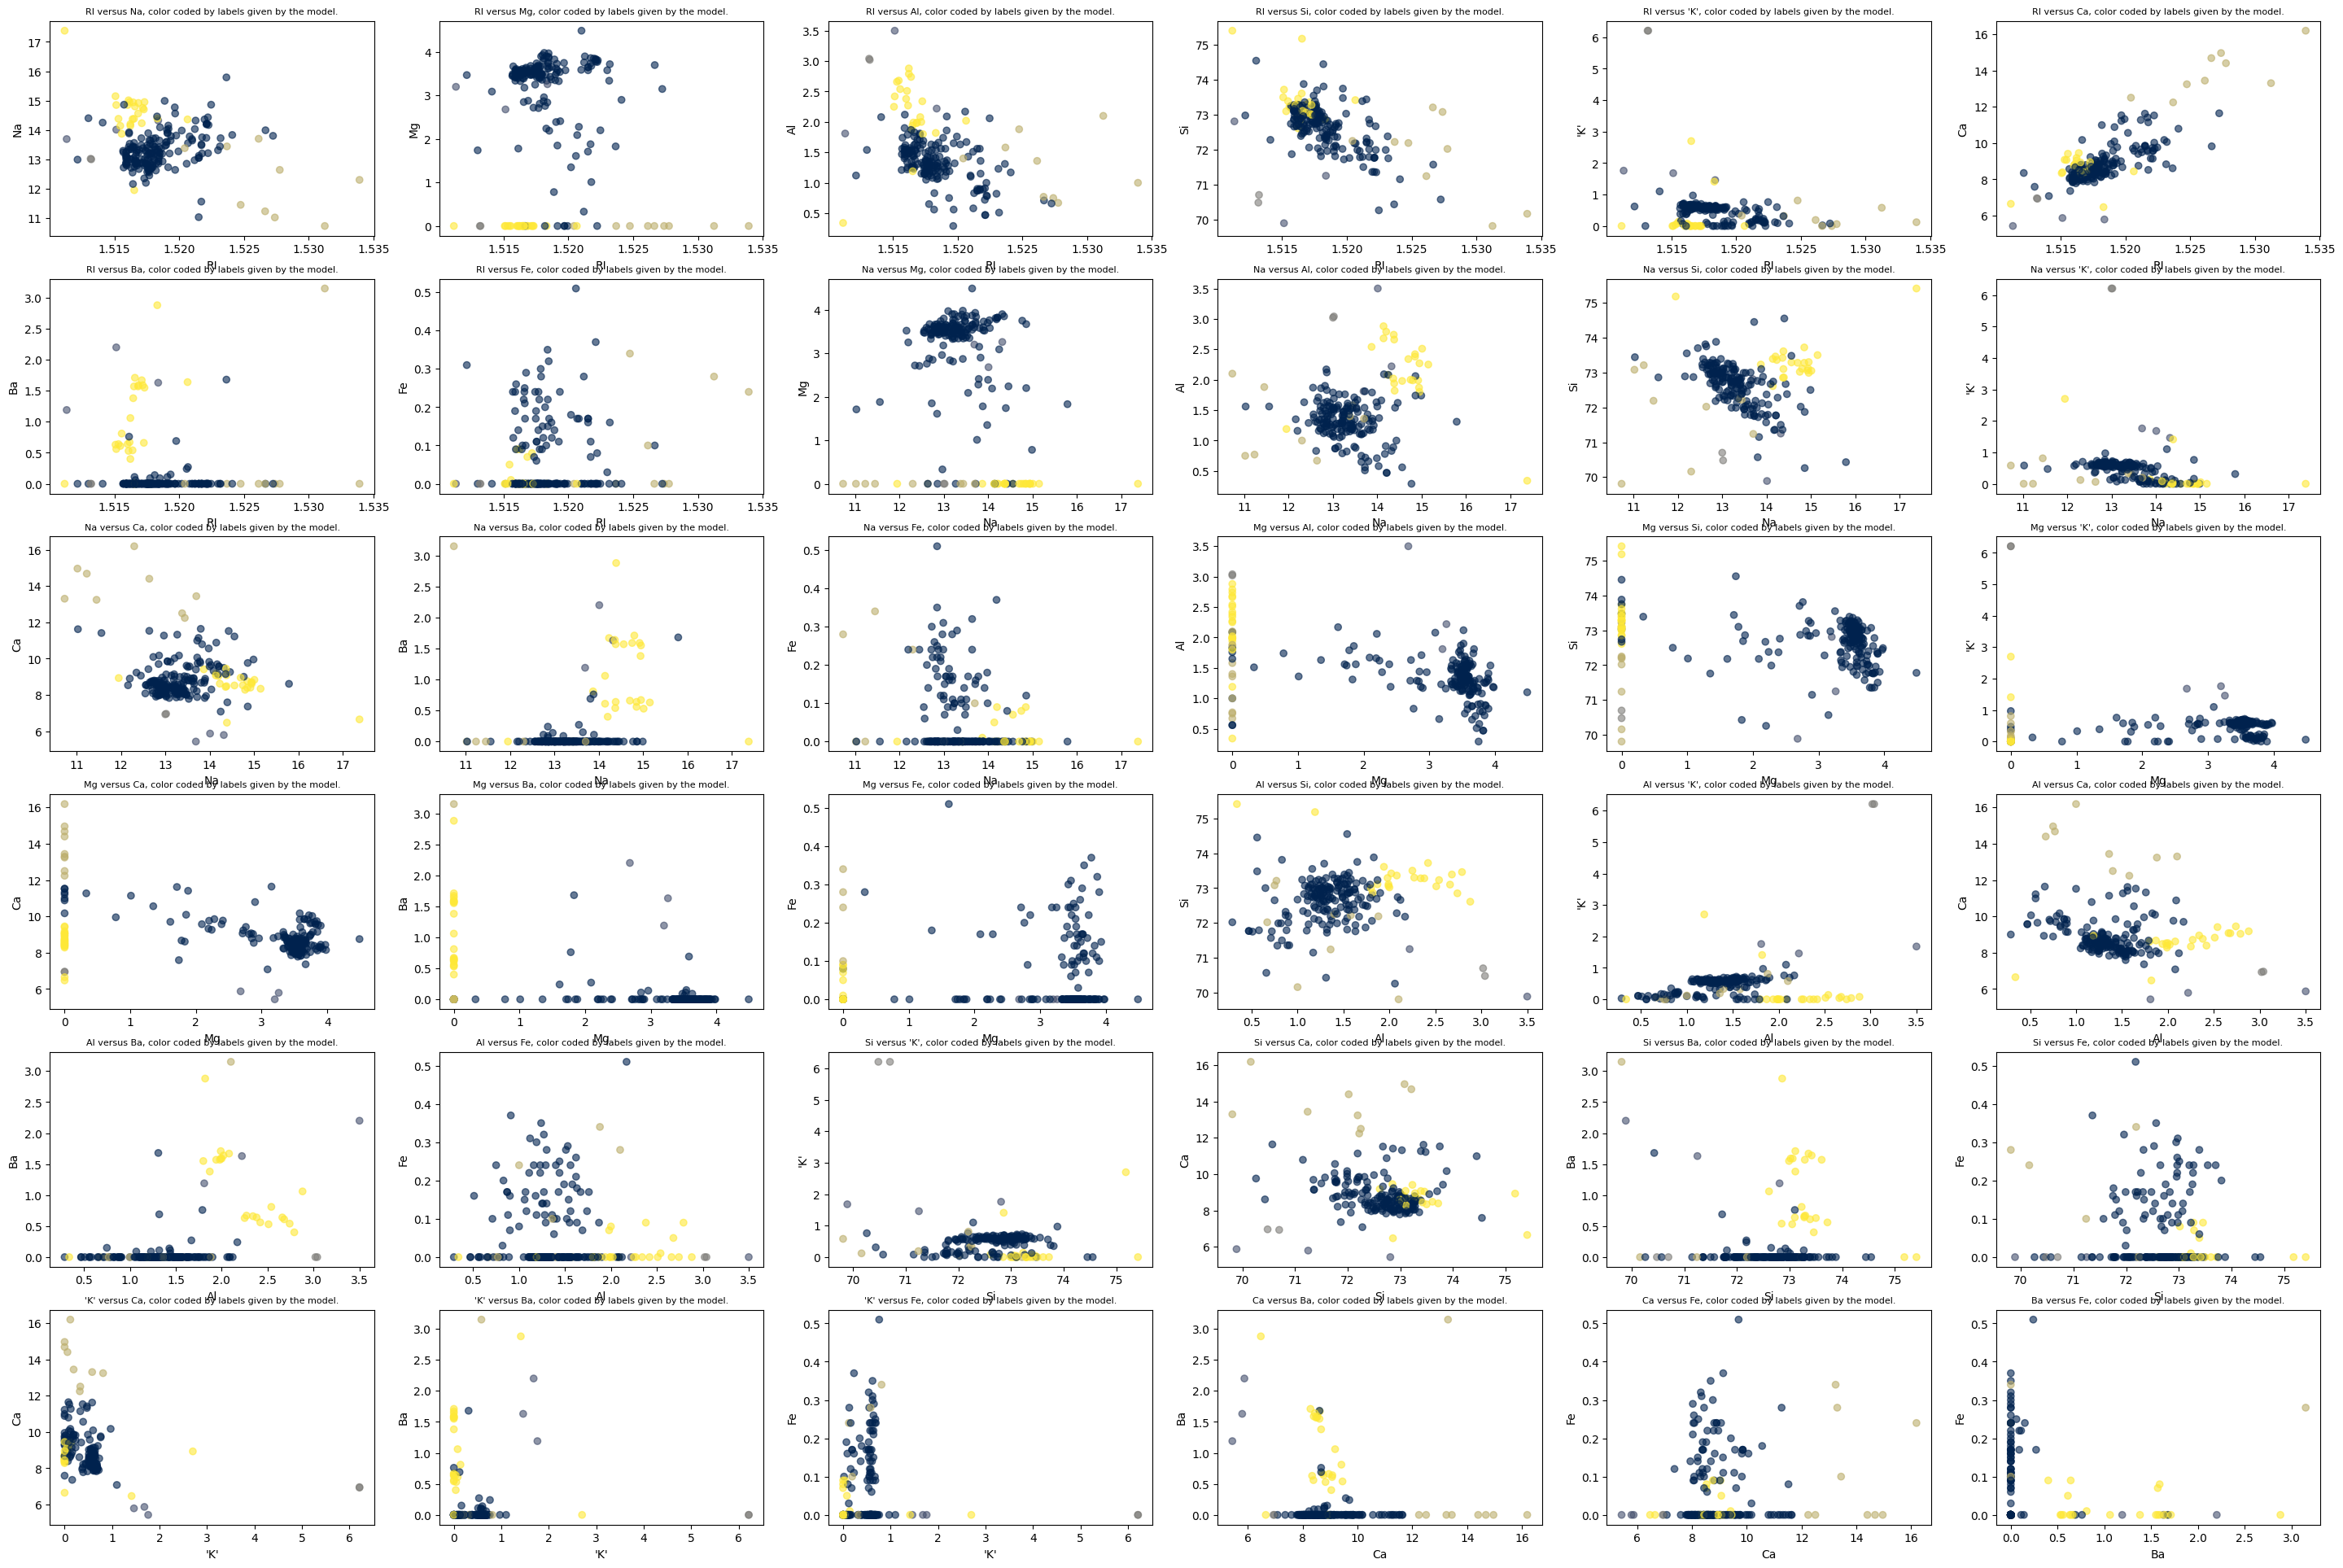

In [168]:
clusters_by_chemical(df=df, features=all_features, model_labels=sc_labels, subplots=(6, 6), figsize=(36, 24))

In [ ]:
# What are the most compelling charts?
# 1. Mg VS Al
# 2. Na VS Ba
# 3. Mg VS Ba
# 4. Al VS Ca
# 5. Si VS Ba
# 6. Ba VS Fe

In [170]:
compelling_charts = [("Mg", "Al"), ("Mg", "Ba"), ("Ca", "Al"), ("Na", "Ba"), ("Si", "Ba"), ("Ba", "Fe")]

In [248]:
def one_by_one_plot(df, model_labels, subplots: bool, figure_size: tuple, features: tuple, axes=None, ax_count=None):
    f1, f2 = features
    
    if not subplots:
        plt.figure(figsize=figure_size)
        scatter = plt.scatter(df[f1], df[f2], c=model_labels, cmap="cividis", s=50)
        plt.colorbar(scatter, label="Cluster Label")
        plt.title(f"{f1} V.S. {f2} with Machine Learning Clusters.")
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.show()
    else:
        scatter = axes[ax_count].scatter(df[f1], df[f2], c=model_labels, cmap="cividis", s=50)
        axes[ax_count].set_title(f"{f1} V.S. {f2} with Machine Learning Clusters.")
        axes[ax_count].set_xlabel(f1)
        axes[ax_count].set_ylabel(f2)
        return scatter

In [260]:
def we_love_subplots(df, model_labels, list_of_plots: list, figure_size: tuple, subplot_tuple: tuple):
    n_rows, n_cols = subplot_tuple
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figure_size)
    axes = axes.flatten()

    subplots_bool = n_rows * n_cols < len(list_of_plots)
    assert not subplots_bool, f"You have given {abs(n_rows * n_cols - len(list_of_plots))} less subplots than intended."

    ax_count = 0
    scatters = []
    for couple in list_of_plots:
        scatter = one_by_one_plot(df, model_labels, ax_count=ax_count, subplots=True,
                                figure_size=figure_size, features=couple, axes=axes)
        scatters.append(scatter)
        ax_count += 1

    
    fig.colorbar(scatters[0], ax=axes, label="Cluster Label", pad=0.02)  # Add colorbar using one scatter
    plt.show()

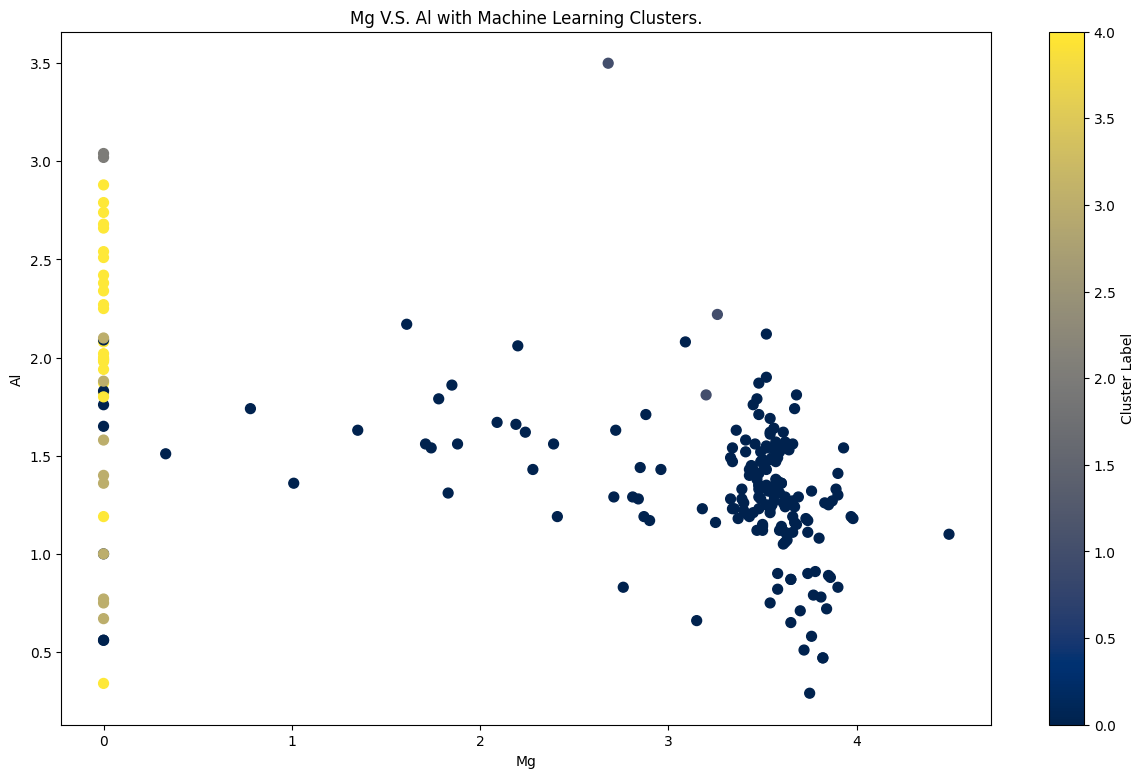

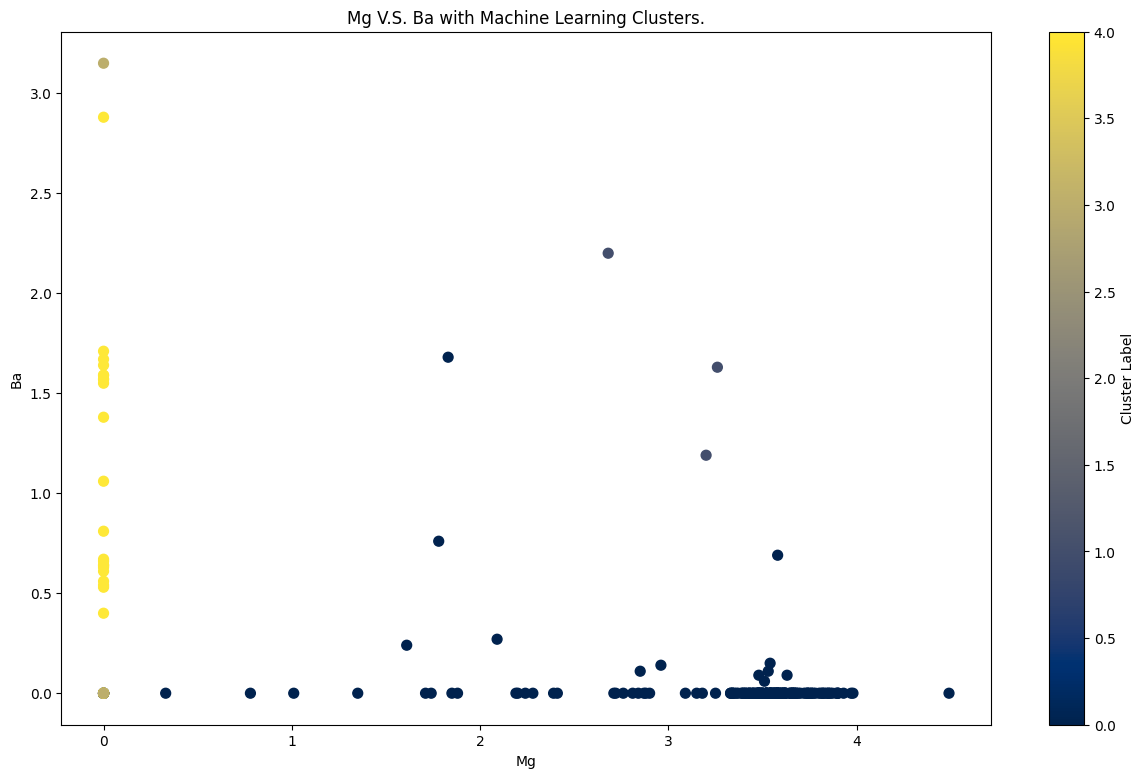

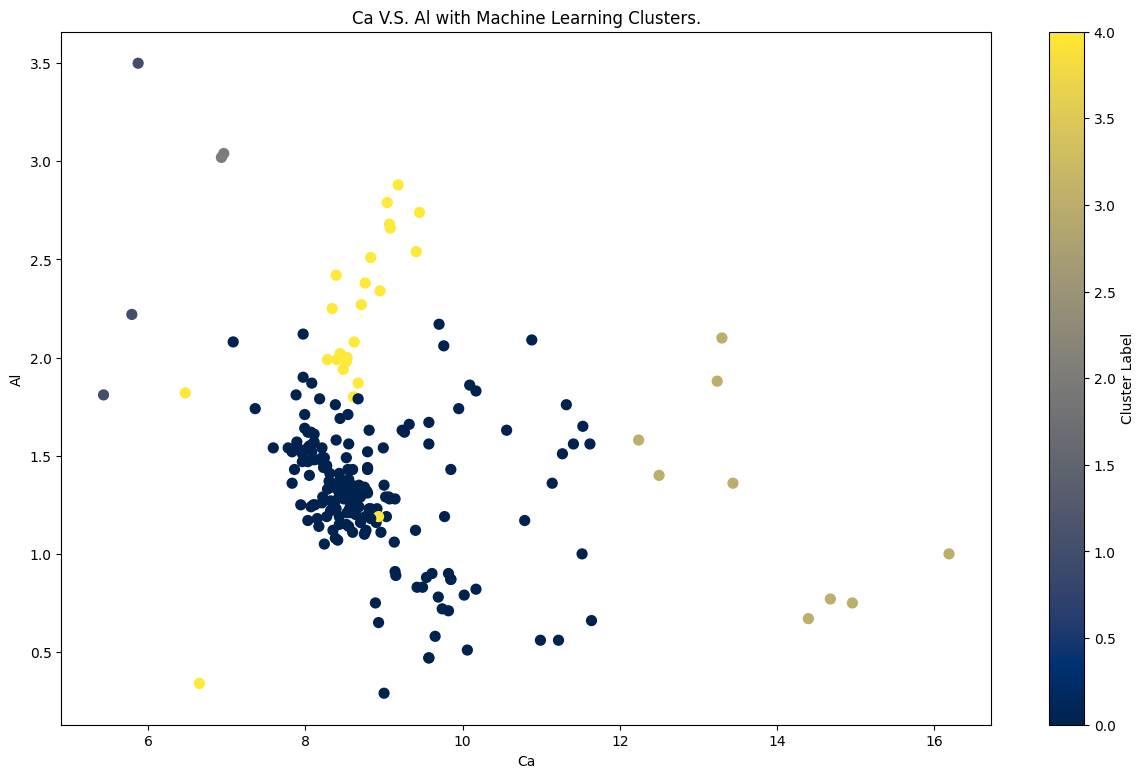

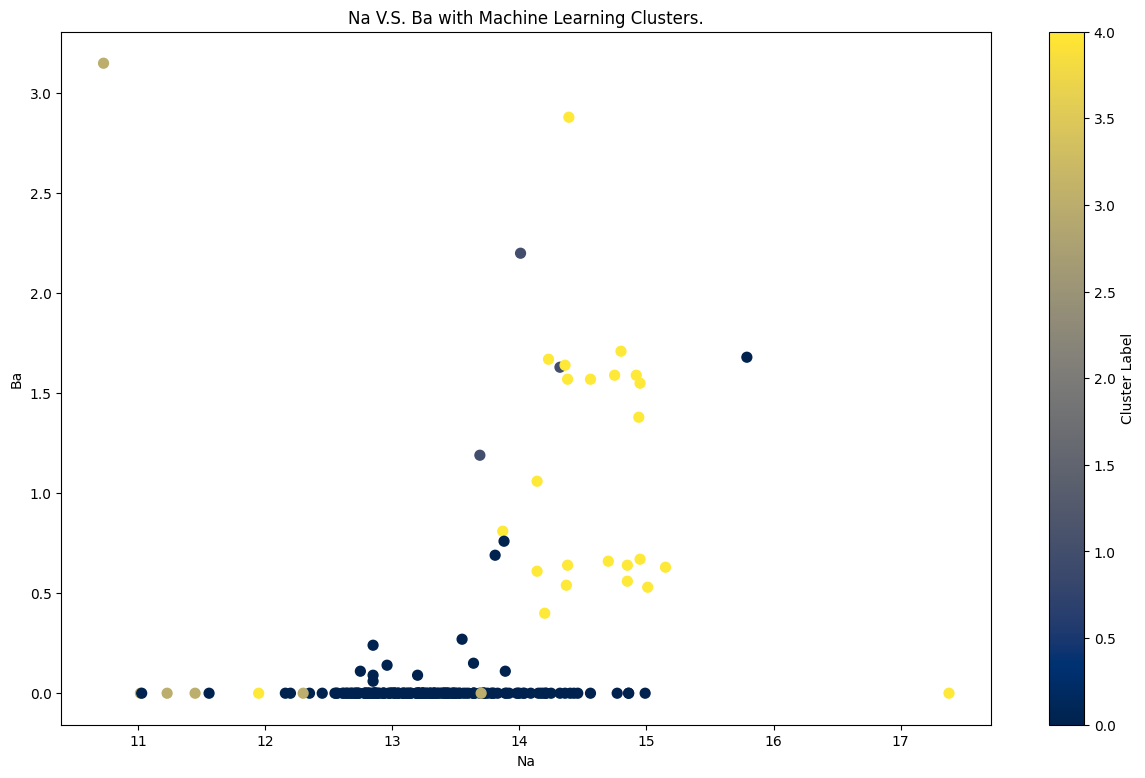

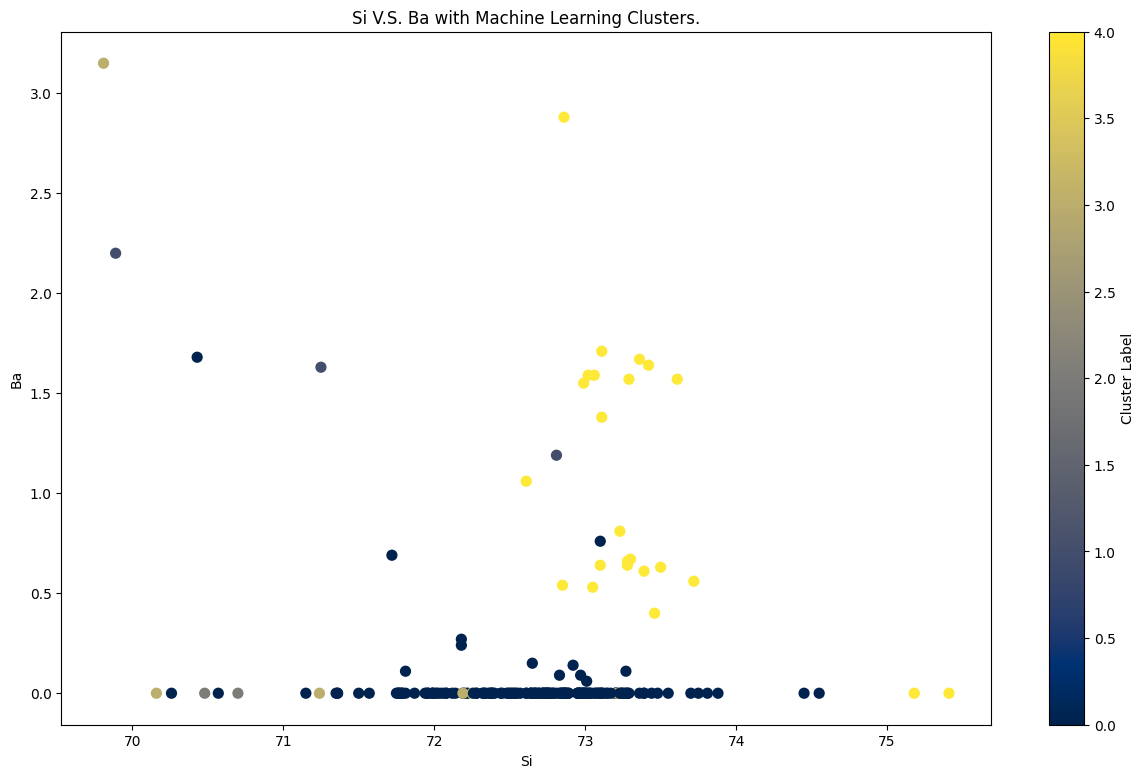

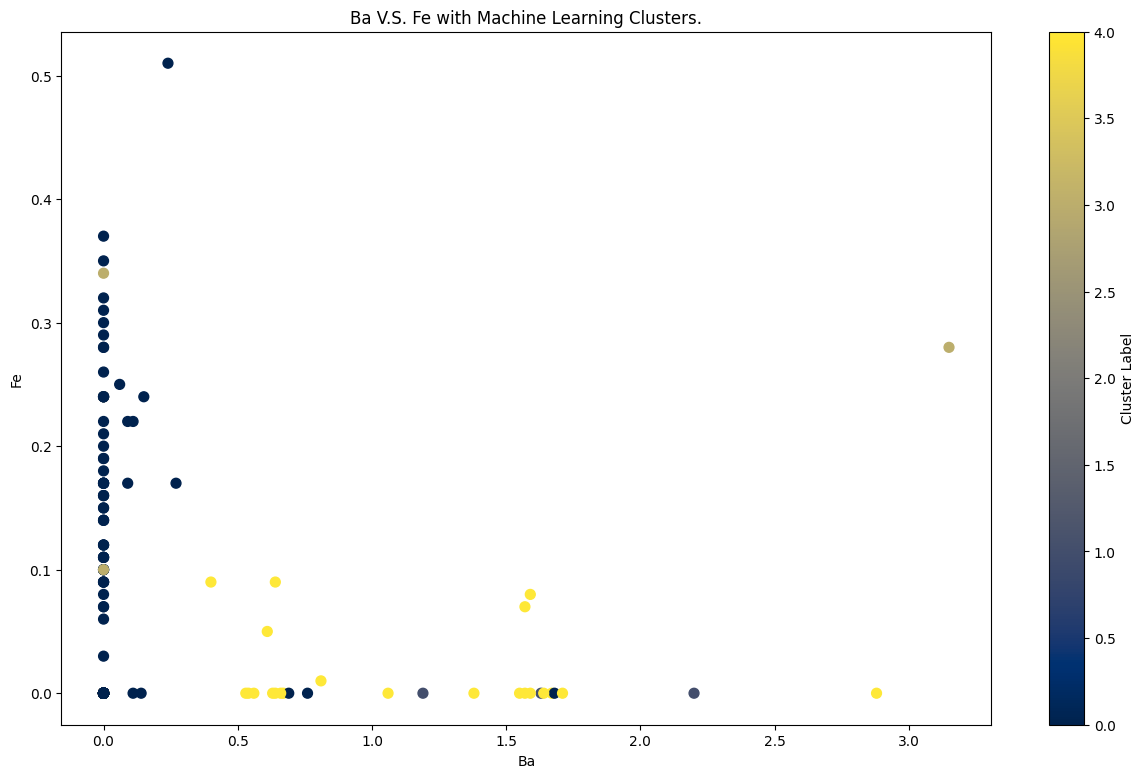

In [261]:
for couple in compelling_charts:
    one_by_one_plot(df=df, model_labels=sc_labels, figure_size=(15, 9), features=couple, subplots=False, ax_count=None)

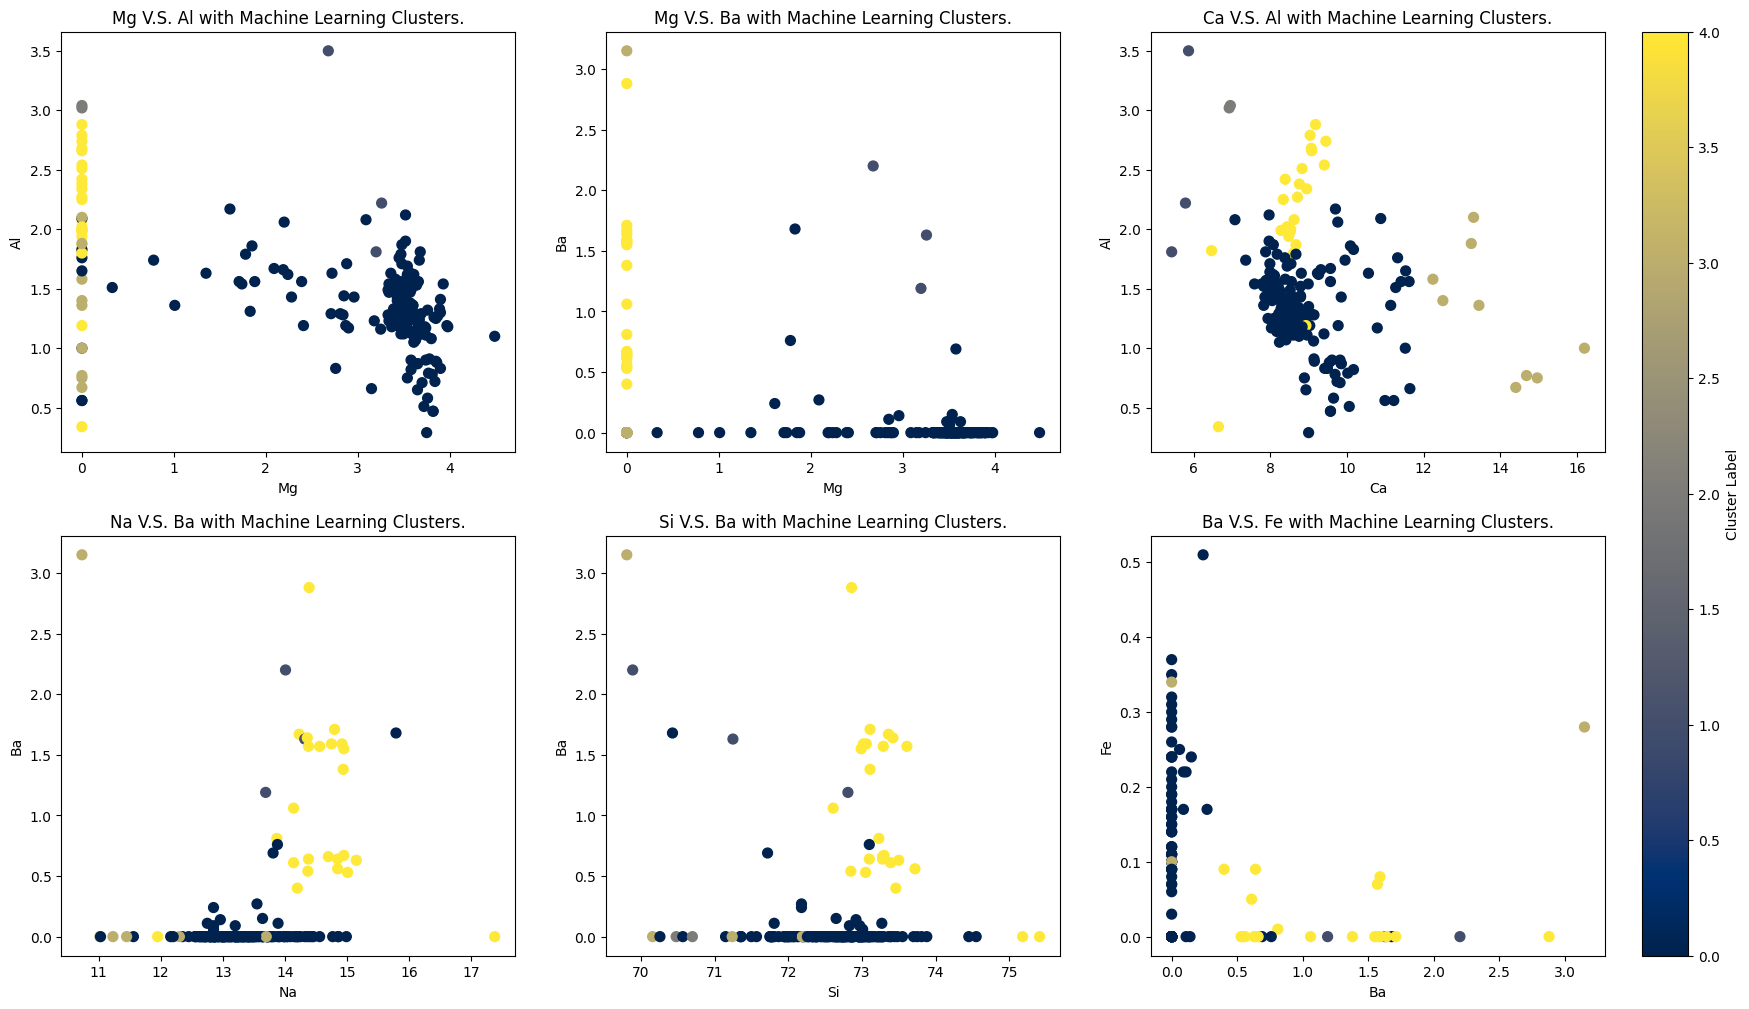

In [262]:
we_love_subplots(df, model_labels=sc_labels, list_of_plots=compelling_charts, figure_size=(24, 12), subplot_tuple=(2,3))

In [190]:
cluster_dataframe = df[all_features].copy()

In [192]:
cluster_dataframe["Cluster Labels"] = sc_labels

In [194]:
cluster_dataframe.head(20)

RI     Na    Mg    Al     Si   'K'     Ca    Ba    Fe  Cluster Labels
0   1.51567  13.29  3.45  1.21  72.74  0.56   8.57  0.00  0.00               0
1   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10               0
2   1.51514  14.01  2.68  3.50  69.89  1.68   5.87  2.20  0.00               1
3   1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.00  0.00               0
4   1.52068  13.55  2.09  1.67  72.18  0.53   9.57  0.27  0.17               0
5   1.51707  13.48  3.48  1.71  72.52  0.62   7.99  0.00  0.00               0
6   1.51839  12.85  3.67  1.24  72.57  0.62   8.68  0.00  0.35               0
7   1.51872  12.93  3.66  1.56  72.51  0.58   8.55  0.00  0.12               0
8   1.51786  12.73  3.43  1.19  72.95  0.62   8.76  0.00  0.30               0
9   1.51617  14.95  0.00  2.27  73.30  0.00   8.71  0.67  0.00               4
10  1.51623  14.14  0.00  2.88  72.61  0.08   9.18  1.06  0.00               4
11  1.51673  13.30  3.64  1.53  72.53  0.65   8.03  0.00  0.29               0
12  1.52177  13.75  1.01  1.36  72.19  0.33  11.14  0.00  0.00               0
13  1.51750  12.82  3.55  1.49  72.75  0.54   8.52  0.00  0.19               0
14  1.52127  14.32  3.90  0.83  71.50  0.00   9.49  0.00  0.00               0
15  1.51905  13.60  3.62  1.11  72.64  0.14   8.76  0.00  0.00               0
16  1.51683  14.56  0.00  1.98  73.29  0.00   8.52  1.57  0.07               4
17  1.51667  12.94  3.61  1.26  72.75  0.56   8.60  0.00  0.00               0
18  1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00               0
19  1.51592  12.86  3.52  2.12  72.66  0.69   7.97  0.00  0.00               0

In [214]:
gcdf = cluster_dataframe.sort_values(by="Cluster Labels")

In [215]:
gcdf.head(20)

RI     Na    Mg    Al     Si   'K'     Ca    Ba    Fe  Cluster Labels
0   1.51567  13.29  3.45  1.21  72.74  0.56   8.57  0.00  0.00               0
1   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10               0
3   1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.00  0.00               0
4   1.52068  13.55  2.09  1.67  72.18  0.53   9.57  0.27  0.17               0
6   1.51839  12.85  3.67  1.24  72.57  0.62   8.68  0.00  0.35               0
5   1.51707  13.48  3.48  1.71  72.52  0.62   7.99  0.00  0.00               0
7   1.51872  12.93  3.66  1.56  72.51  0.58   8.55  0.00  0.12               0
8   1.51786  12.73  3.43  1.19  72.95  0.62   8.76  0.00  0.30               0
14  1.52127  14.32  3.90  0.83  71.50  0.00   9.49  0.00  0.00               0
11  1.51673  13.30  3.64  1.53  72.53  0.65   8.03  0.00  0.29               0
13  1.51750  12.82  3.55  1.49  72.75  0.54   8.52  0.00  0.19               0
12  1.52177  13.75  1.01  1.36  72.19  0.33  11.14  0.00  0.00               0
15  1.51905  13.60  3.62  1.11  72.64  0.14   8.76  0.00  0.00               0
19  1.51592  12.86  3.52  2.12  72.66  0.69   7.97  0.00  0.00               0
18  1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.00  0.00               0
17  1.51667  12.94  3.61  1.26  72.75  0.56   8.60  0.00  0.00               0
31  1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00               0
26  1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26               0
30  1.51618  13.01  3.50  1.48  72.89  0.60   8.12  0.00  0.00               0
20  1.51610  13.42  3.40  1.22  72.69  0.59   8.32  0.00  0.00               0

In [217]:
df_cluster_0 = gcdf[gcdf["Cluster Labels"] == 0]
df_cluster_1 = gcdf[gcdf["Cluster Labels"] == 1]
df_cluster_2 = gcdf[gcdf["Cluster Labels"] == 2]
df_cluster_3 = gcdf[gcdf["Cluster Labels"] == 3]
df_cluster_4 = gcdf[gcdf["Cluster Labels"] == 4]

In [218]:
clusters = [df_cluster_0, df_cluster_1, df_cluster_2, df_cluster_3, df_cluster_4]

In [231]:
for i in clusters:
    print(80*"-")
    for j in range(9):
        print(f"This cluster has the average {all_features[j]} value of {i.mean()[j]}")
    print()
    print(f"Number of Rows = {i.shape[0]}")

--------------------------------------------------------------------------------
This cluster has the average RI value of 1.5183214772727274
This cluster has the average Na value of 13.301874999999997
This cluster has the average Mg value of 3.2122159090909084
This cluster has the average Al value of 1.3217613636363637
This cluster has the average Si value of 72.64090909090909
This cluster has the average 'K' value of 0.4664772727272727
This cluster has the average Ca value of 8.835511363636364
This cluster has the average Ba value of 0.024943181818181816
This cluster has the average Fe value of 0.06164772727272727

Number of Rows = 176
--------------------------------------------------------------------------------
This cluster has the average RI value of 1.5149433333333333
This cluster has the average Na value of 14.006666666666666
This cluster has the average Mg value of 3.046666666666667
This cluster has the average Al value of 2.5100000000000002
This cluster has the average Si val

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4140\49261582.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"This cluster has the average {all_features[j]} value of {i.mean()[j]}")


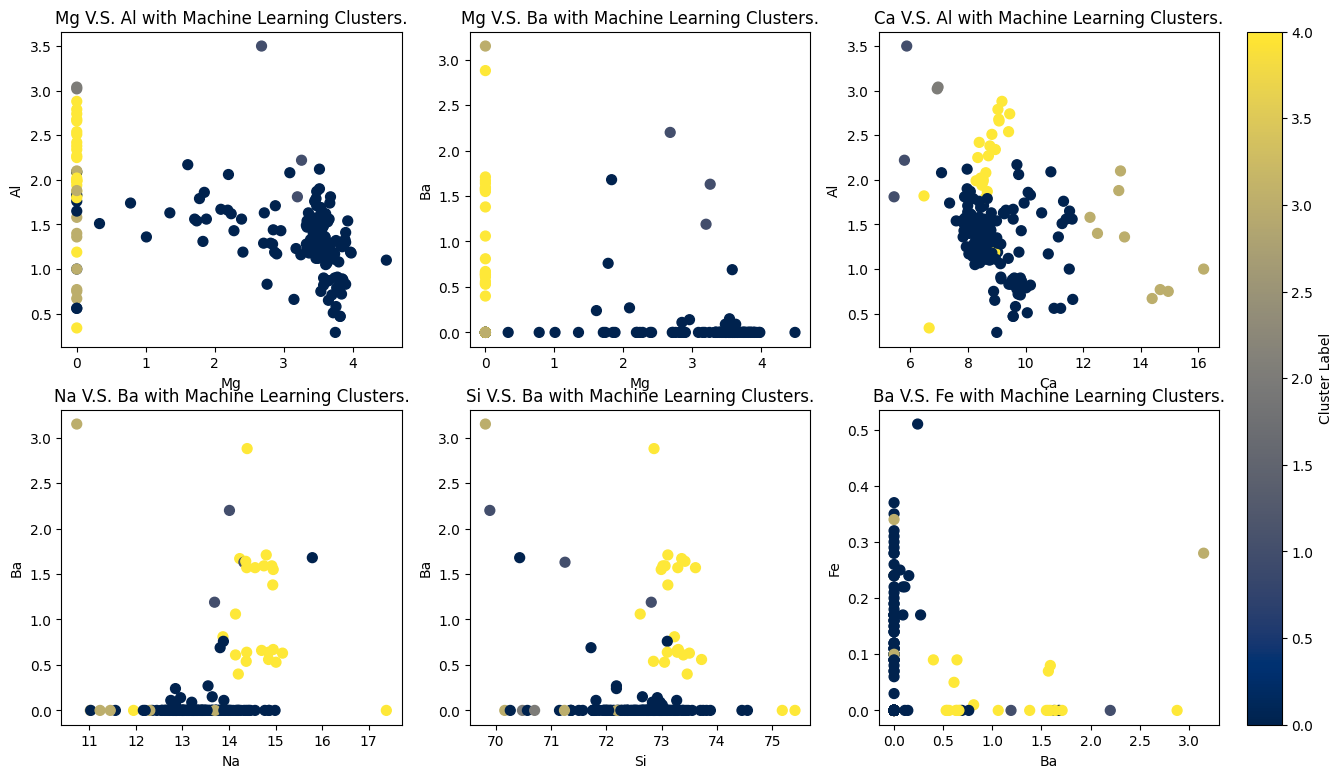

In [263]:
we_love_subplots(df, model_labels=sc_labels, list_of_plots=compelling_charts, figure_size=(18, 9), subplot_tuple=(2,3))

In [272]:
average_chemical_df = pd.DataFrame(columns=["RI", 'Na', 'Mg', 'Al', 'Si', r"'K'", 'Ca', 'Ba', 'Fe'], index=range(5))

for j in range(len(all_features)):
    for i in range(len(clusters)):
        print(f"Cluster {i}'s Average {all_features[j]} = {clusters[i].mean()[j]:.5}")
    print(45*"-")

for i in range(len(clusters)):
    for feature in all_features:
        average_chemical_df.at[i, feature] = clusters[i][feature].mean()

Cluster 0's Average RI = 1.5183
Cluster 1's Average RI = 1.5149
Cluster 2's Average RI = 1.5132
Cluster 3's Average RI = 1.5269
Cluster 4's Average RI = 1.5164
---------------------------------------------
Cluster 0's Average Na = 13.302
Cluster 1's Average Na = 14.007
Cluster 2's Average Na = 13.01
Cluster 3's Average Na = 12.21
Cluster 4's Average Na = 14.593
---------------------------------------------
Cluster 0's Average Mg = 3.2122
Cluster 1's Average Mg = 3.0467
Cluster 2's Average Mg = 0.0
Cluster 3's Average Mg = 0.0
Cluster 4's Average Mg = 0.0
---------------------------------------------
Cluster 0's Average Al = 1.3218
Cluster 1's Average Al = 2.51
Cluster 2's Average Al = 3.03
Cluster 3's Average Al = 1.2789
Cluster 4's Average Al = 2.145
---------------------------------------------
Cluster 0's Average Si = 72.641
Cluster 1's Average Si = 71.317
Cluster 2's Average Si = 70.59
Cluster 3's Average Si = 71.798
Cluster 4's Average Si = 73.383
---------------------------------

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4140\3841154590.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Cluster {i}'s Average {all_features[j]} = {clusters[i].mean()[j]:.5}")


In [275]:
average_chemical_df = average_chemical_df.astype(float).round(5)
average_chemical_df.head()

RI        Na       Mg       Al        Si      'K'        Ca       Ba       Fe
0  1.51832  13.30187  3.21222  1.32176  72.64091  0.46648   8.83551  0.02494  0.06165
1  1.51494  14.00667  3.04667  2.51000  71.31667  1.63333   5.69667  1.67333  0.00000
2  1.51318  13.01000  0.00000  3.03000  70.59000  6.21000   6.94500  0.00000  0.00000
3  1.52689  12.21000  0.00000  1.27889  71.79778  0.26778  13.88333  0.35000  0.10667
4  1.51635  14.59250  0.00000  2.14500  73.38292  0.18917   8.57542  1.03750  0.01625

In [294]:
average_chemical_df.rename(columns={r"'K'": "K"}, inplace=True)

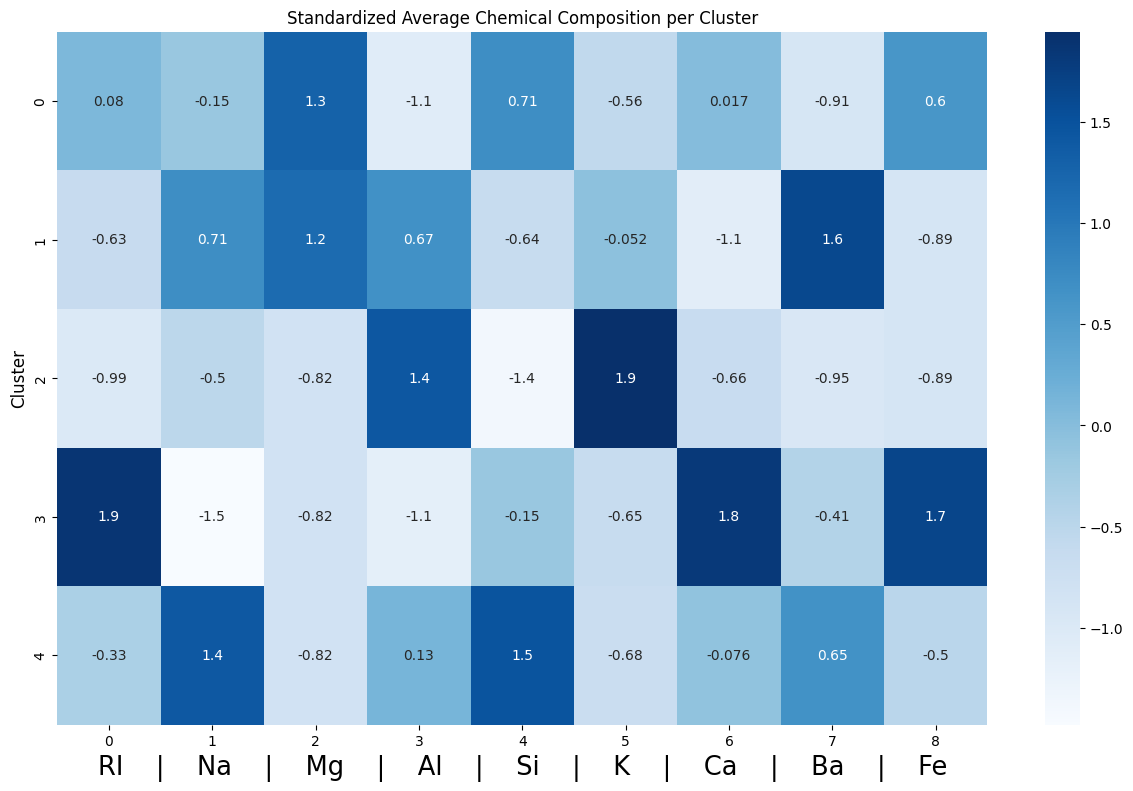

In [315]:
standardizer = skl.preprocessing.StandardScaler()
normal_acdf = standardizer.fit_transform(average_chemical_df)

plt.figure(figsize=(15,9))
sns.heatmap(normal_acdf, annot=True, cmap="Blues")
plt.title("Standardized Average Chemical Composition per Cluster")
plt.xlabel("    |    ".join(average_chemical_df.columns), size=18.5)
plt.ylabel("Cluster", size=12)
plt.show()